### This notebook will investigate the long-term average ocean properties observed in the global ocean using the World Ocean Atlas 18 gridded dataset ([Boyer et al., 2018](https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.nodc:NCEI-WOA18)) hosted by NOAA's National Centers for Environmental Information (NCEI) and based on data in the World Ocean Database (WOD).

### From www.ncei.noaa.gov: _The World Ocean Atlas (WOA) is a collection of gridded, quality controlled temperature, salinity, oxygen, phosphate, silicate, and nitrate means on standard depth levels based on profile data from the World Ocean Database (WOD). It can be used to create boundary and/or initial conditions for a variety of ocean models, verify numerical simulations of the ocean, and corroborate satellite data._

### The WOA is published semi-regulary since 1994 and is based off of the ground breaking Climatological Atlas of the World Ocean published by NOAA scientist Sydney Levitus in 1982 (while at NOAA's Geophysical Fluid Dynamics Laboratory). __The WOA is one of the most widely used datasets in oceanography and climate science__.

![](https://books.google.com/books/content?id=_x0IAQAAIAAJ&pg=PR1&img=1&zoom=3&hl=en&sig=ACfU3U1UpmEg019E4PriRYiyjSzvlagEDQ&w=1025)

### The gridded WOA dataset is used to:
* #### Development and evaluation of ocean models.
* #### Development and evaluation of fully coupled climate models.
* #### Provides the __initial conditions__ for climate model simulations.
* #### Verification of ocean surface properties against satellite observations.
* #### Planning oceanographic expeditions and observational campaigns.
* #### Assessing physical and biogeochemical properties in the ocean and their change.

#### Authors: Dr. Rebecca L. Beadling. For any questions regarding the contents of this notebook please contact rebecca.beadling@temple.edu.

## Read in the data

In [1]:
import xarray as xr
import cmocean 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors 
import cftime
import wocemaps 

In [2]:
dir(wocemaps) #this allows us to see all of the properties and methods in the package

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'alkalinity',
 'cdict_alkalinity',
 'cdict_cfc11',
 'cdict_d14c',
 'cdict_d3he',
 'cdict_depth',
 'cdict_neutraldensity',
 'cdict_nitrate',
 'cdict_oxygen',
 'cdict_phosphate',
 'cdict_potentialdensity',
 'cdict_potentialtemperature',
 'cdict_salinity',
 'cdict_silicate',
 'cdict_totalco2',
 'cdict_tritium',
 'cfc11',
 'd14c',
 'd3he',
 'depth',
 'mpl',
 'ndensity',
 'nitrate',
 'np',
 'oxygen',
 'pdensity',
 'phosphate',
 'plt',
 'potentialtemp',
 'salinity',
 'silicate',
 'totalco2',
 'tritium']

In [3]:
xr.set_options(display_style='html')
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6 
plt.style.use("dark_background") ### sets dark background for all plots

In [4]:
ees_climate_dir = 'C:/Users/TU_Climate24_Student/Desktop/ees_climate/'
woa18_data = xr.open_zarr(ees_climate_dir+'Unit4Pszczolkowski/data/woa18/woa18_full_decadal_ave_fields/')

In [5]:
woa18_data

<xarray.Dataset>
Dimensions:   (depth: 102, lat: 180, lon: 360)
Coordinates:
  * depth     (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * lat       (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon       (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    nitrate   (depth, lat, lon) float32 dask.array<chunksize=(26, 45, 180), meta=np.ndarray>
    oxygen    (depth, lat, lon) float32 dask.array<chunksize=(26, 45, 180), meta=np.ndarray>
    salinity  (depth, lat, lon) float32 dask.array<chunksize=(26, 45, 180), meta=np.ndarray>
    temp      (depth, lat, lon) float32 dask.array<chunksize=(26, 45, 180), meta=np.ndarray>

#### <span style="color:red"> What variables are contained in our `woa18_data` dataset?

In [6]:
woa18_data.variables

Frozen({'depth': <xarray.IndexVariable 'depth' (depth: 102)>
array([0.00e+00, 5.00e+00, 1.00e+01, 1.50e+01, 2.00e+01, 2.50e+01, 3.00e+01,
       3.50e+01, 4.00e+01, 4.50e+01, 5.00e+01, 5.50e+01, 6.00e+01, 6.50e+01,
       7.00e+01, 7.50e+01, 8.00e+01, 8.50e+01, 9.00e+01, 9.50e+01, 1.00e+02,
       1.25e+02, 1.50e+02, 1.75e+02, 2.00e+02, 2.25e+02, 2.50e+02, 2.75e+02,
       3.00e+02, 3.25e+02, 3.50e+02, 3.75e+02, 4.00e+02, 4.25e+02, 4.50e+02,
       4.75e+02, 5.00e+02, 5.50e+02, 6.00e+02, 6.50e+02, 7.00e+02, 7.50e+02,
       8.00e+02, 8.50e+02, 9.00e+02, 9.50e+02, 1.00e+03, 1.05e+03, 1.10e+03,
       1.15e+03, 1.20e+03, 1.25e+03, 1.30e+03, 1.35e+03, 1.40e+03, 1.45e+03,
       1.50e+03, 1.55e+03, 1.60e+03, 1.65e+03, 1.70e+03, 1.75e+03, 1.80e+03,
       1.85e+03, 1.90e+03, 1.95e+03, 2.00e+03, 2.10e+03, 2.20e+03, 2.30e+03,
       2.40e+03, 2.50e+03, 2.60e+03, 2.70e+03, 2.80e+03, 2.90e+03, 3.00e+03,
       3.10e+03, 3.20e+03, 3.30e+03, 3.40e+03, 3.50e+03, 3.60e+03, 3.70e+03,
       3.80e+03

##### The variables in this dataset include: 
* depth
* lat
* lon
* nitrate
* oxygen
* salinity
* temp

#### <span style="color:red"> Write code in the cell below that extract each DataArray from the `woa18_data` dataset and assign it to variables corresponding to the DataArray name following the example for temperature below.

In [7]:
nitrate = woa18_data['nitrate']
oxygen = woa18_data['oxygen']
salinity = woa18_data['salinity']
temp = woa18_data['temp']
depth = woa18_data['depth']
lat = woa18_data['lat']
lon = woa18_data['lon']

#### Investigating our `temp` array shows that it has the dimensions `depth`, `lat`, `lon`. Our DataArrays do NOT have a time dimension becuase they are the long-term average of each property (spanning all available time periods of observations). Our `lat`, `lon` dimensions indicate this data on a global 1-degree grid (360 grid cells in longitude x 180 grid cells in latitude), and on 102 depth levels that span the surface to 5500 m.

In [8]:
# Extract each DataArray from the dataset and assign to corresponding variables
temp = woa18_data['temp']
salinity = woa18_data['salinity']
nitrate = woa18_data['nitrate']
oxygen = woa18_data['oxygen']

# Now we have each variable separately and can access them as needed
print(temp)  # Example: print out the 'temp' DataArray
print(salinity)  # Example: print out the 'salinity' DataArray
print(nitrate)  # Example: print out the 'nitrate' DataArray
print(oxygen)  # Example: print out the 'oxygen' DataArray

<xarray.DataArray 'temp' (depth: 102, lat: 180, lon: 360)>
dask.array<open_dataset-temp, shape=(102, 180, 360), dtype=float32, chunksize=(26, 45, 180), chunktype=numpy.ndarray>
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Attributes:
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    coordinates:    time lat lon depth
    grid_mapping:   crs
    long_name:      Objectively analyzed mean fields for sea_water_temperatur...
    standard_name:  sea_water_temperature
    units:          degrees_celsius
<xarray.DataArray 'salinity' (depth: 102, lat: 180, lon: 360)>
dask.array<open_dataset-salinity, shape=(102, 180, 360), dtype=float32, chunksize=(26, 45, 180), chunktype=numpy.ndarray>
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+

#### Notice that our `depth` coordinate values span 0 to 5500, with 0 being at the ocean surface. <span style="color:red"> In the cell below, the code produce a simple global map of surface temperature.

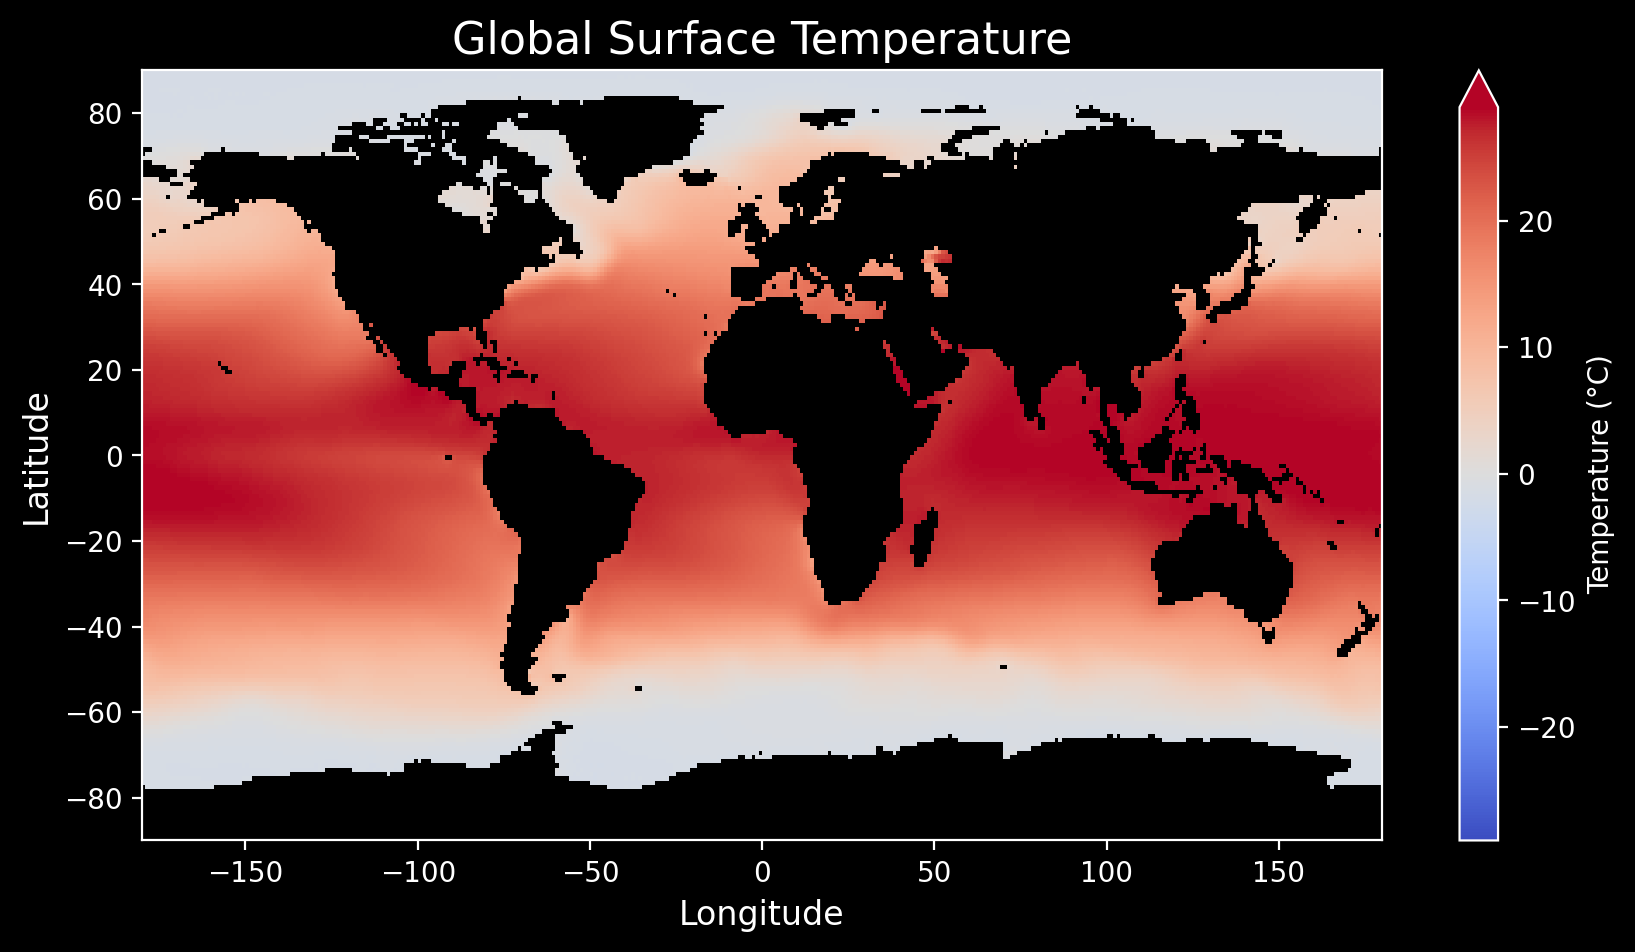

In [9]:
surface_temp = temp.isel(depth=0)  # Select the surface (depth 0)

# Plot the surface temperature
plt.figure(figsize=(10, 5))
surface_temp.plot(cmap='coolwarm', robust=True, cbar_kwargs={'label': 'Temperature (°C)'})

# Add title and labels
plt.title('Global Surface Temperature', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Show the plot
plt.show()

#### After making an simple plot, we can look at your plot in detail and customize the arguments within our `array.plot()` method to pick appropriate `vmin` and `vmax` values for the colorbar. Since this is ocean temperature here we use the `cmocean.cm.thermal` colormap. We also add `.contourf` to our `.plot` method to specificy that we want to make a __filled contour__ map. This will make our data look smoother as it interpolates between points.
    
#### We add another argument of `levels=integer_value` and set the integer value to indicate the number of levels we want your colorbar to be broken up into. How does this change your ability to evaluate the data?

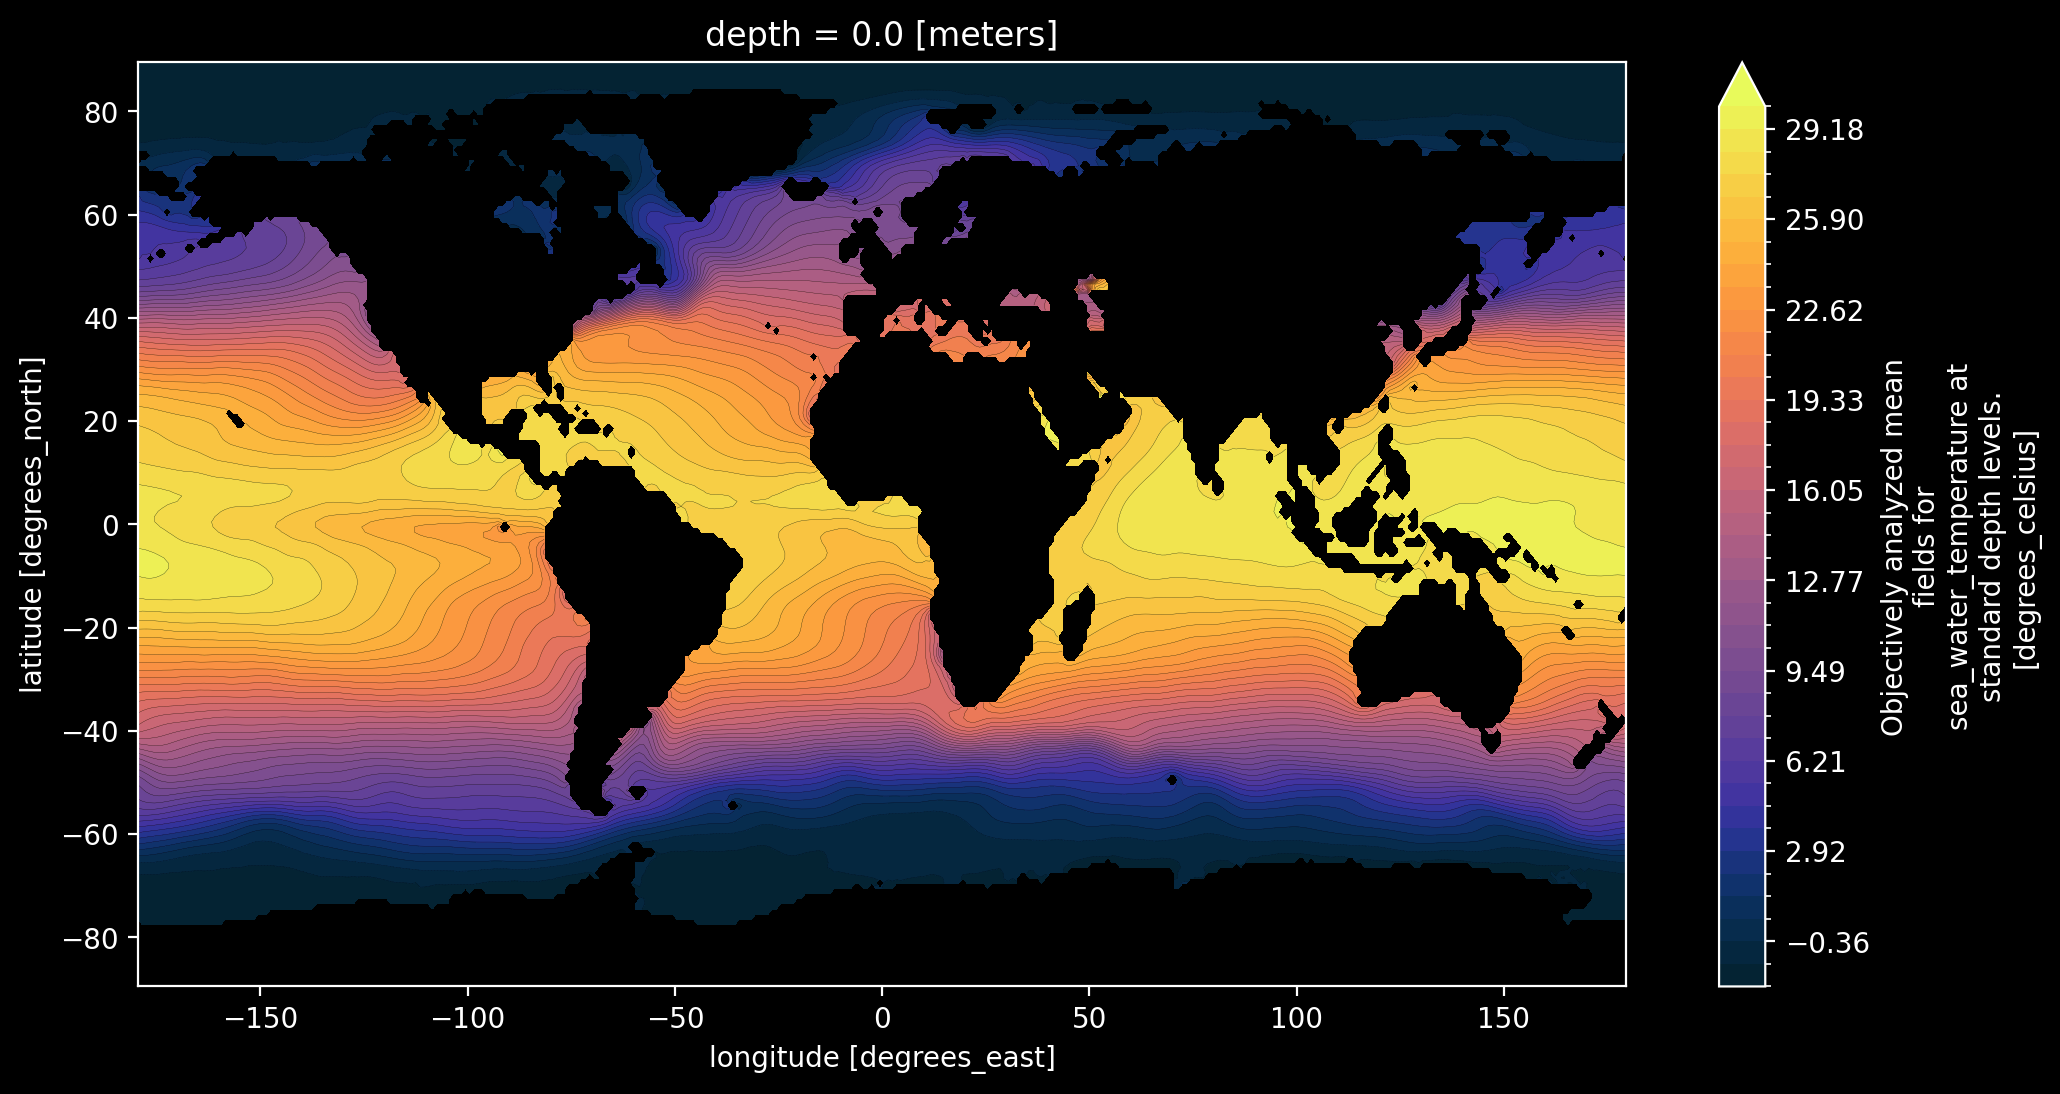

In [10]:
temp.sel(depth=0).plot.contourf(vmin=-2,                  
                       vmax=30,cmap=cmocean.cm.thermal,
                       levels=40)

#### Add black contours over top of our filled contour plot, by specifying .plot.contour():
temp.sel(depth=0).plot.contour(vmin=-2,
                       vmax=30,colors='black',linewidths=0.1,
                       levels=40)

#### <span style="color:red"> Repeat the excercise above in the cells below, producing surface maps of salinity, oxygen, and nitrate.

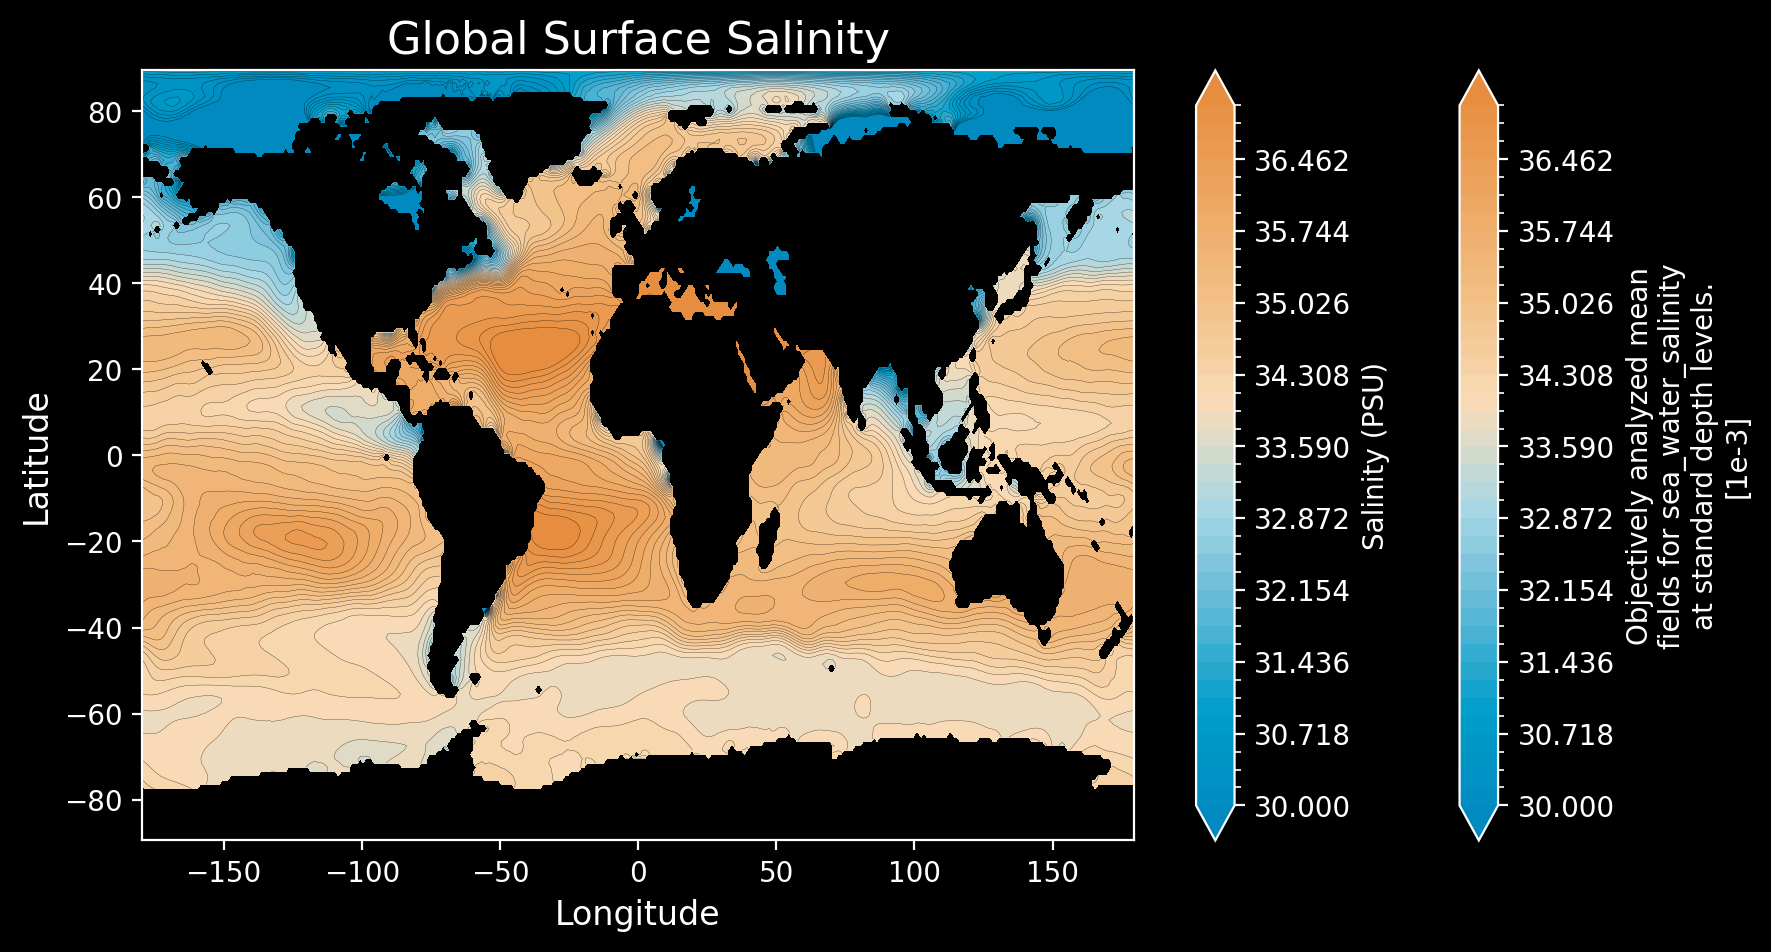

In [11]:
# Accessing the cdict_salinity dictionary from wocemaps
cdict_salinity = wocemaps.cdict_salinity

# Convert the color dictionary to a LinearSegmentedColormap
salinity_cmap = mcolors.LinearSegmentedColormap('salinity_cmap', cdict_salinity)

# Create the plot with specific figure size
plt.figure(figsize=(10, 5))

# Plot the surface salinity with contourf using the specified colormap
contour = salinity.sel(depth=0).plot.contourf(vmin=30, vmax=37, cmap=salinity_cmap, levels=40)

# Overlay black contours on top of the filled contour plot
salinity.sel(depth=0).plot.contour(vmin=30, vmax=37, colors='black', linewidths=0.1, levels=40)

# Add color bar using the contour object
plt.colorbar(contour, label='Salinity (PSU)')

# Add title and labels
plt.title('Global Surface Salinity', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Show the plot
plt.show()

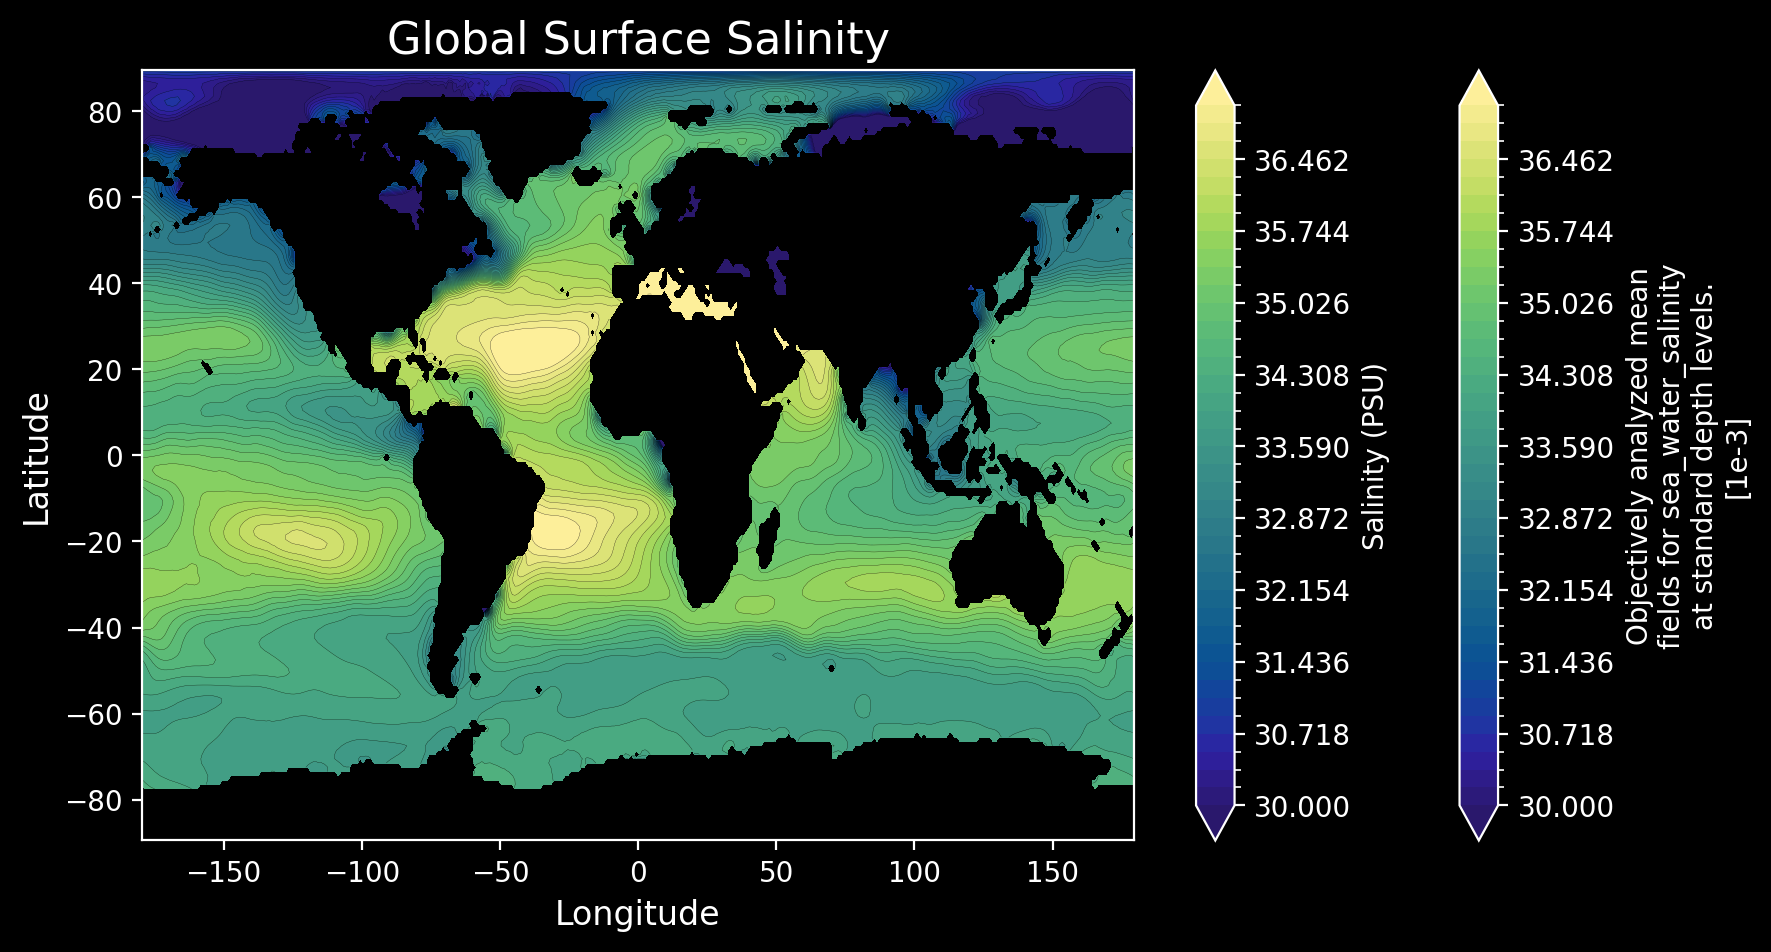

In [12]:
plt.figure(figsize=(10, 5))

# Plot the surface salinity with contourf and store the result
contour = salinity.sel(depth=0).plot.contourf(vmin=30, vmax=37, cmap=cmocean.cm.haline, levels=40)

# Overlay black contours on top of the filled contour plot
salinity.sel(depth=0).plot.contour(vmin=30, vmax=37, colors='black', linewidths=0.1, levels=40)

# Add color bar using the contour object
plt.colorbar(contour, label='Salinity (PSU)')

# Add title and labels
plt.title('Global Surface Salinity', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Show the plot
plt.show()

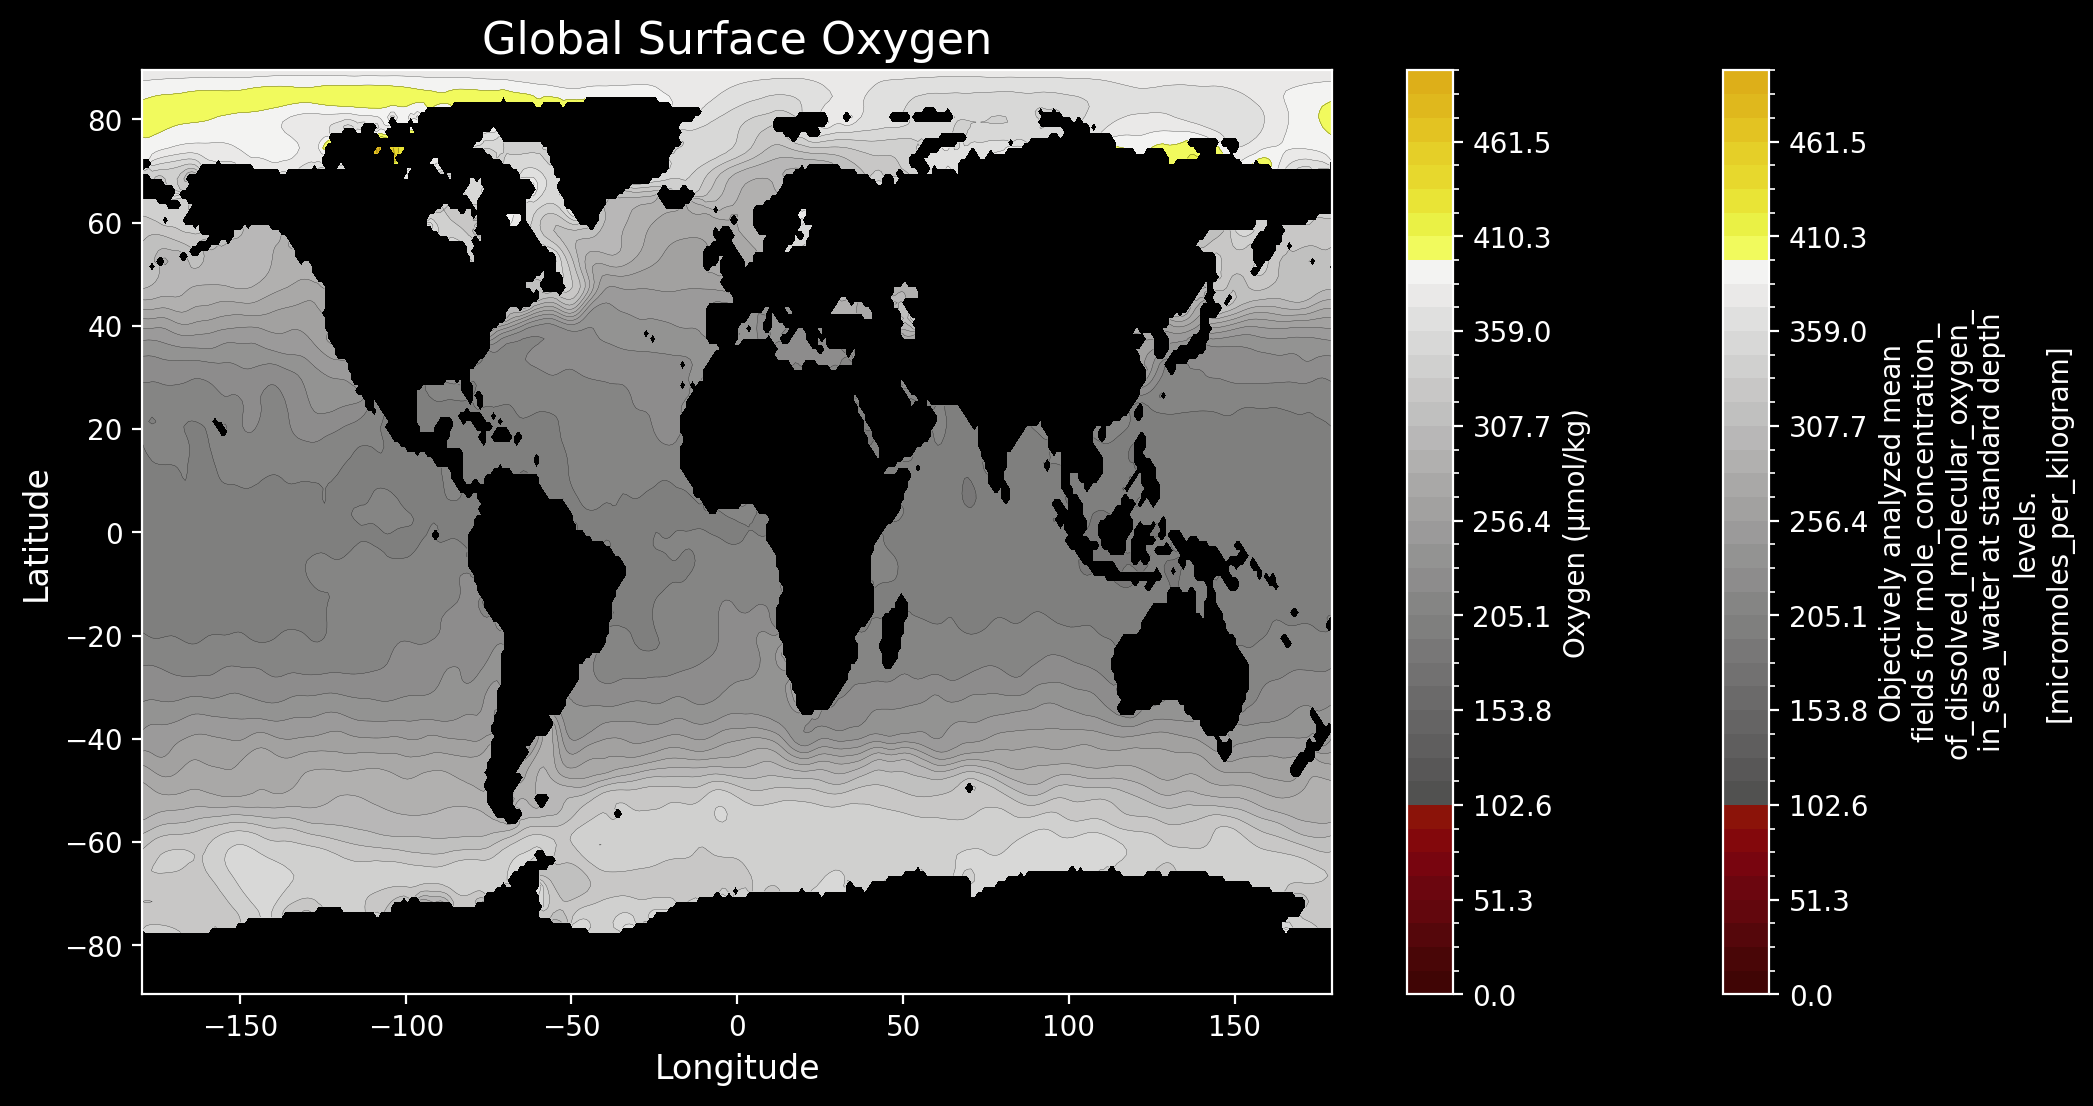

In [13]:
oxygen_plot = oxygen.sel(depth=0).plot.contourf(vmin=0, vmax=500, cmap=cmocean.cm.oxy, levels=40)

# Add black contours over top of the filled contour plot
oxygen.sel(depth=0).plot.contour(vmin=0, vmax=500, colors='black', linewidths=0.1, levels=40)

# Add color bar and labels (pass the contourf object to plt.colorbar)
plt.colorbar(oxygen_plot, label='Oxygen (µmol/kg)')
plt.title('Global Surface Oxygen', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()

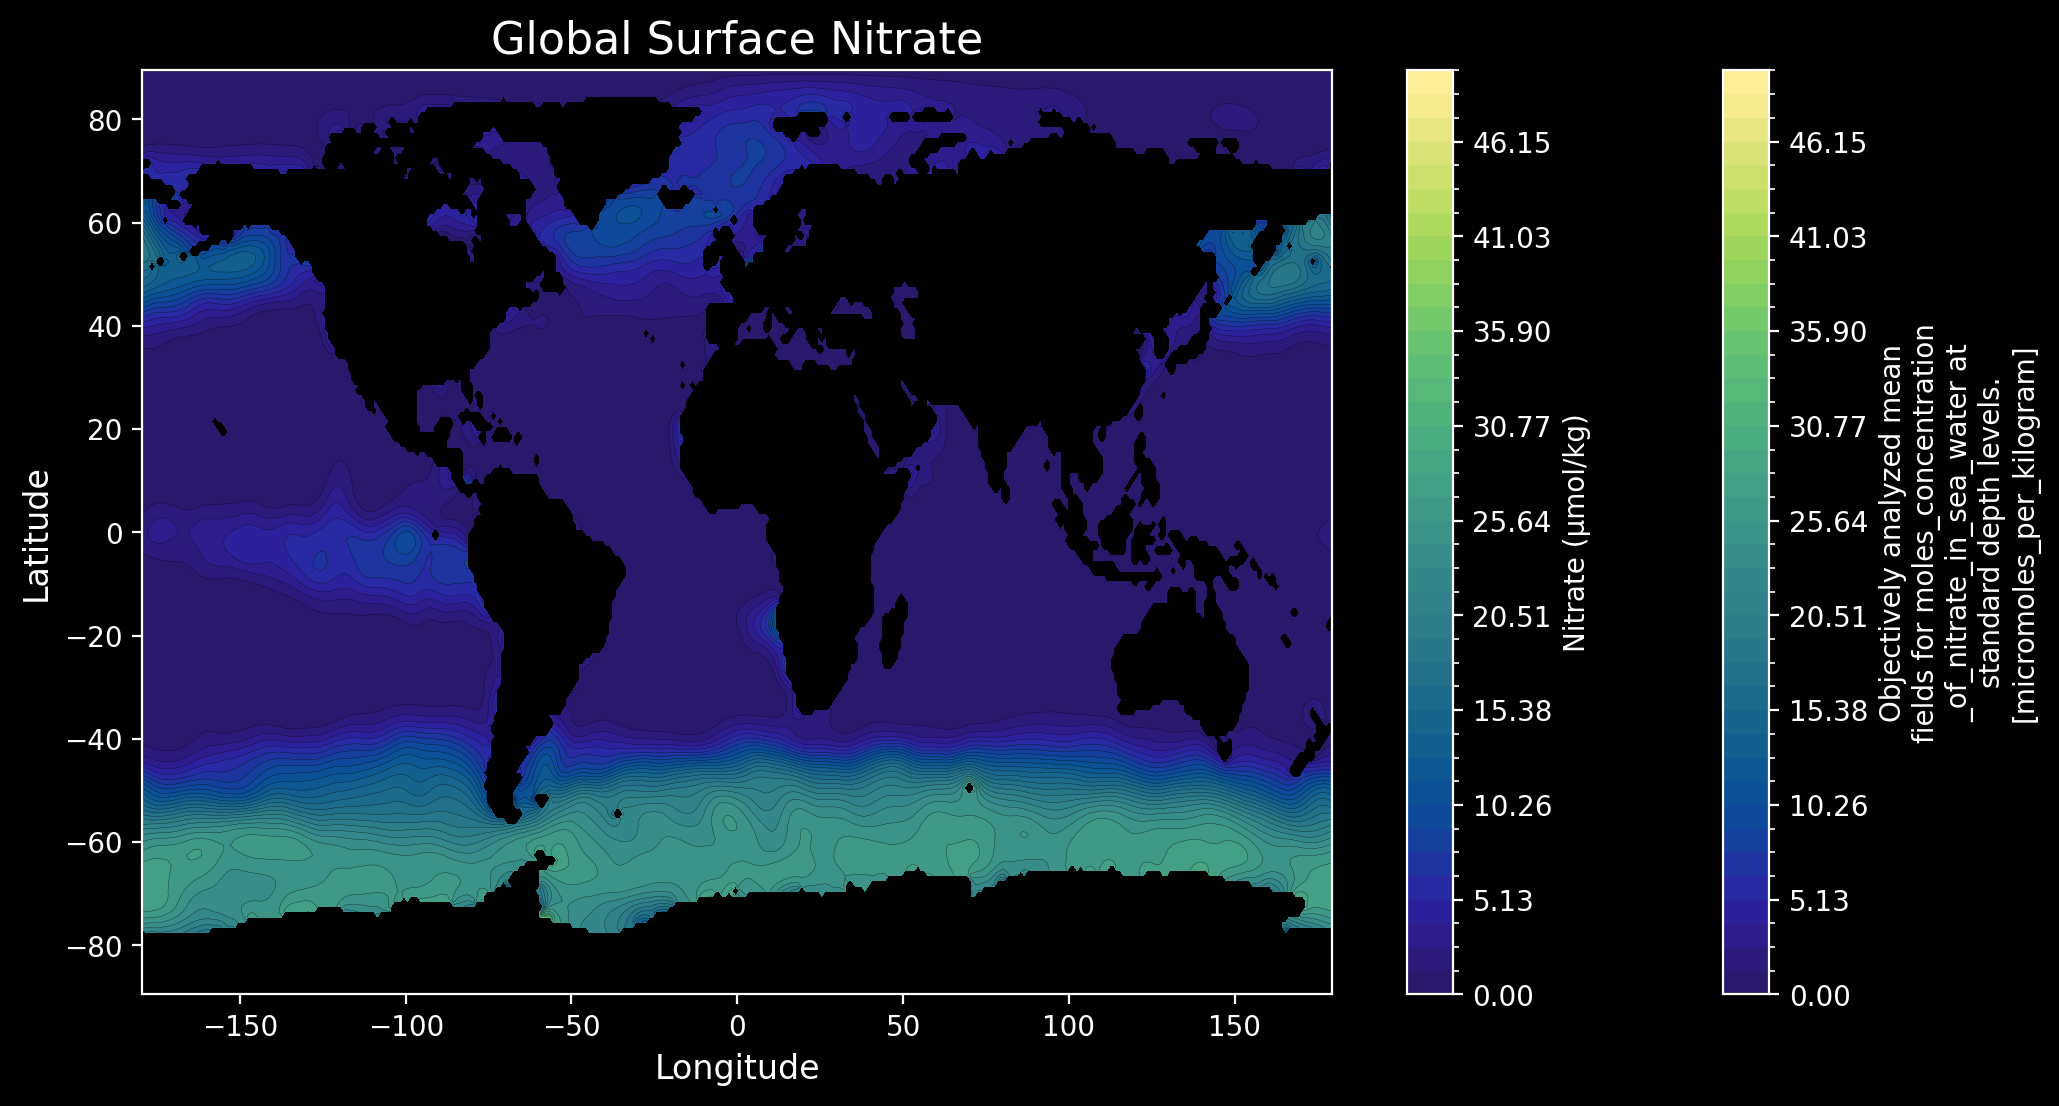

In [14]:
nitrate_plot = nitrate.sel(depth=0).plot.contourf(vmin=0, vmax=50, cmap=cmocean.cm.haline, levels=40)

# Add black contours over top of the filled contour plot
nitrate.sel(depth=0).plot.contour(vmin=0, vmax=50, colors='black', linewidths=0.1, levels=40)

# Add color bar and labels (pass the contourf object to plt.colorbar)
plt.colorbar(nitrate_plot, label='Nitrate (µmol/kg)')
plt.title('Global Surface Nitrate', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()

#### <span style="color:red"> Looking at your surface figures of observed temperature, salinity, oxygen, and nitrate. Discuss any patterns you observe in the cells below:

##### Temperature
Pattern: There are warmer temperatures  found near the equator, meanwhile, there are colder temperatures seen near the poles.

Observation: Strong latitudinal gradient with the equator being much warmer and the poles colder.

##### Salinity:
Pattern: The highest salinity in subtropical regions (Mediterranean), lowest in high-latitude and equatorial regions.

Observation: The subtropical areas are saltier due to evaporation, while areas near the equator and poles have lower salinity from rainfall and ice melting.

##### Oxygen:
Pattern: Higher oxygen concentrations in the polar regions and in upwelling zones, and then lower in subtropical gyres.

Observation: Surface oxygen tends to be higher in colder regions and in areas where deep, oxygen-rich water is brought to the surface.

##### Nitrate:
Pattern: There are higher nitrate concentrations in upwelling zones and coastal regions, and then lower in the open ocean (specially in the subtropics).

Observation: Nutrient-rich areas like upwelling zones show high nitrate levels, while the tropical ocean has lower nitrate due to less biological activity.

### Now lets make a cross-section of temperature, salinity, oxygen, and nitrate through the center of the Atlantic along the A16 repeat hydrographic secton, which is at ~24 degrees West (coordinate of -24 in our arrays).
![](http://sam.ucsd.edu/whp_atlas/atlantic/images/atlantic_click_map.jpg)

In [15]:
A16_temp = temp.sel(lon=-24,method='nearest')

#### Plot of A16_temp

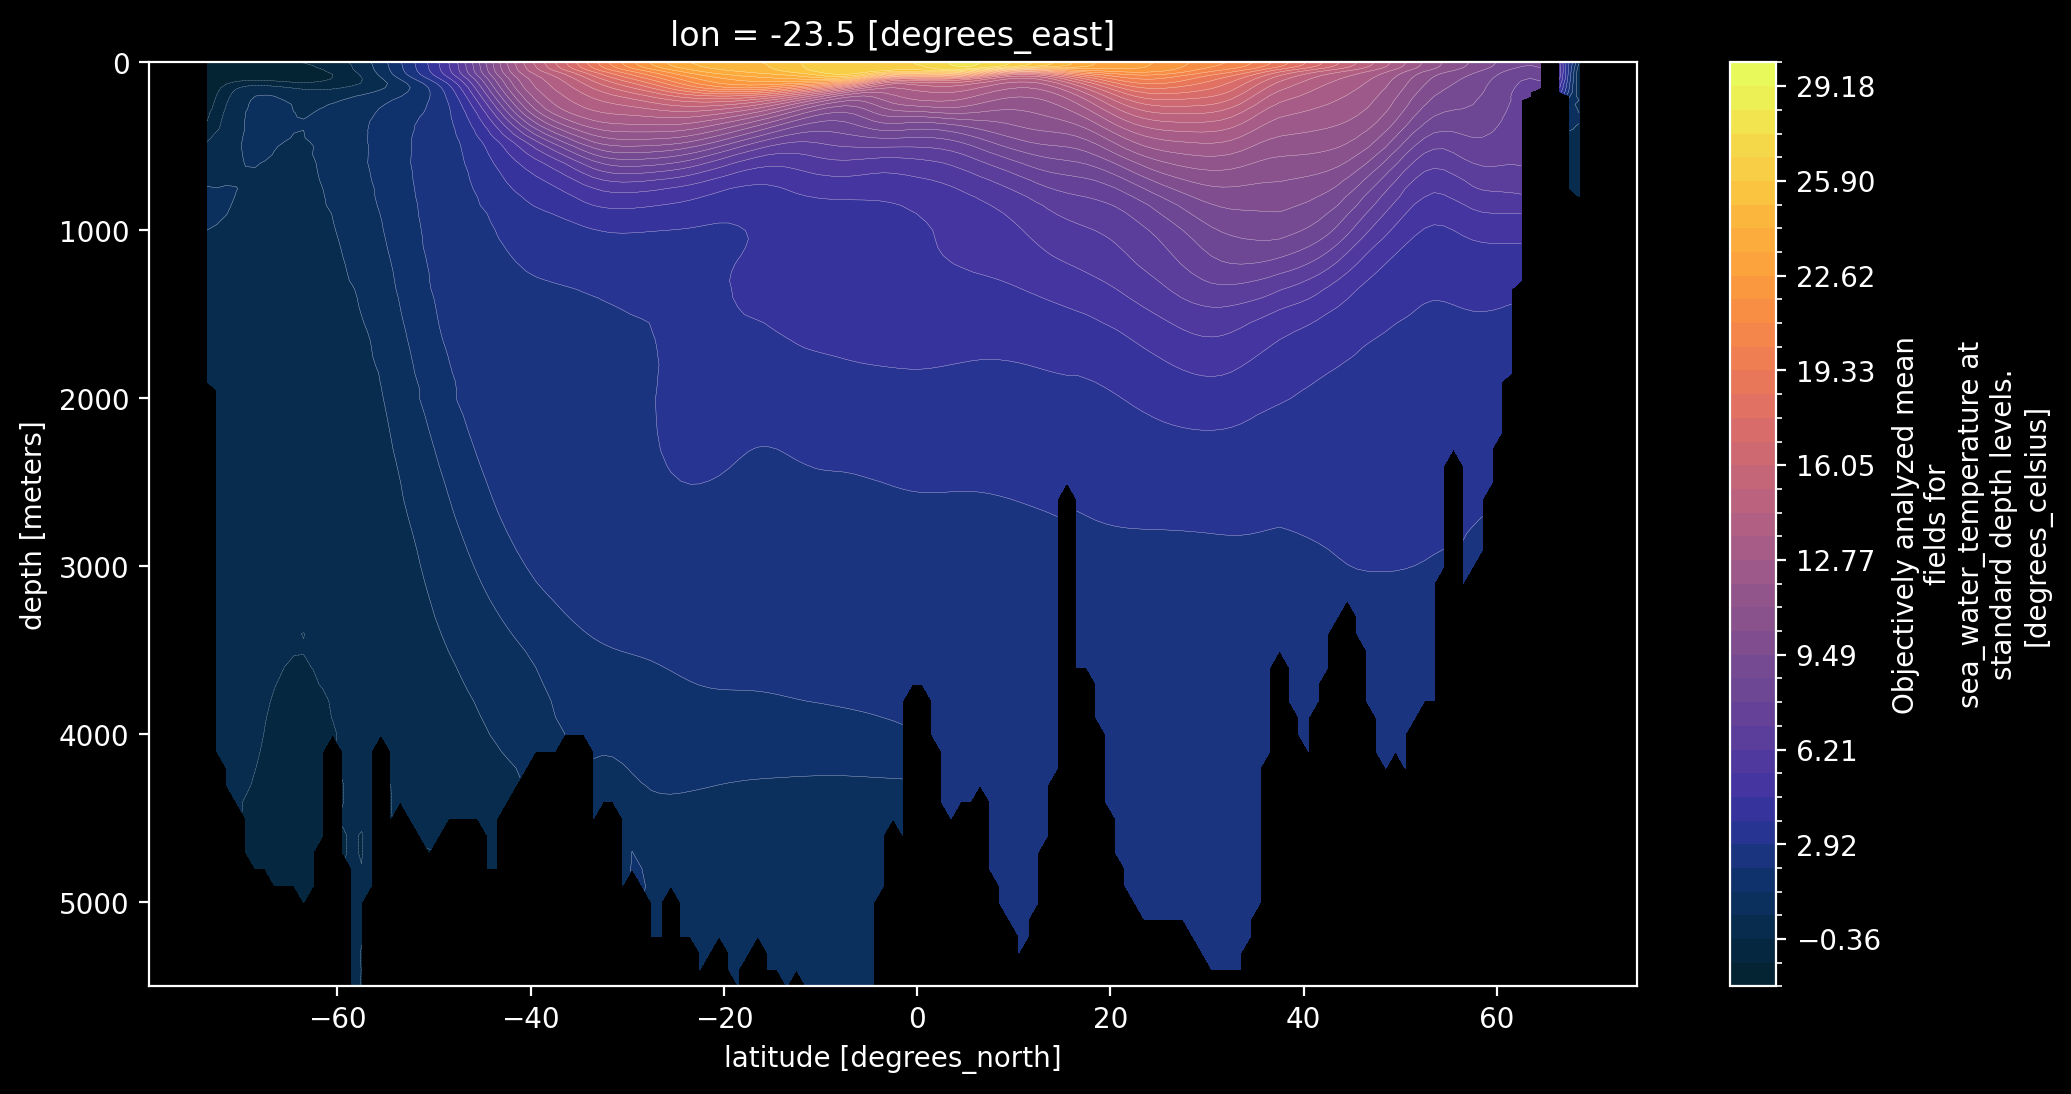

In [16]:
A16_temp.sel(lat=slice(-80,75)).plot.contourf(yincrease=False,
             vmin=-2,
             vmax=30,levels=40,cmap=cmocean.cm.thermal)
A16_temp.sel(lat=slice(-80,75)).plot.contour(yincrease=False,
             vmin=-2,
             vmax=30,
             levels=40,colors='white',linewidths=0.1)

#### <span style="color:red"> In the cells below, produce plots using `.plot.contourf()` and `.plot.contour()` that display the cross-sections of oxygen, nitrate, and salinity along the A16 line:

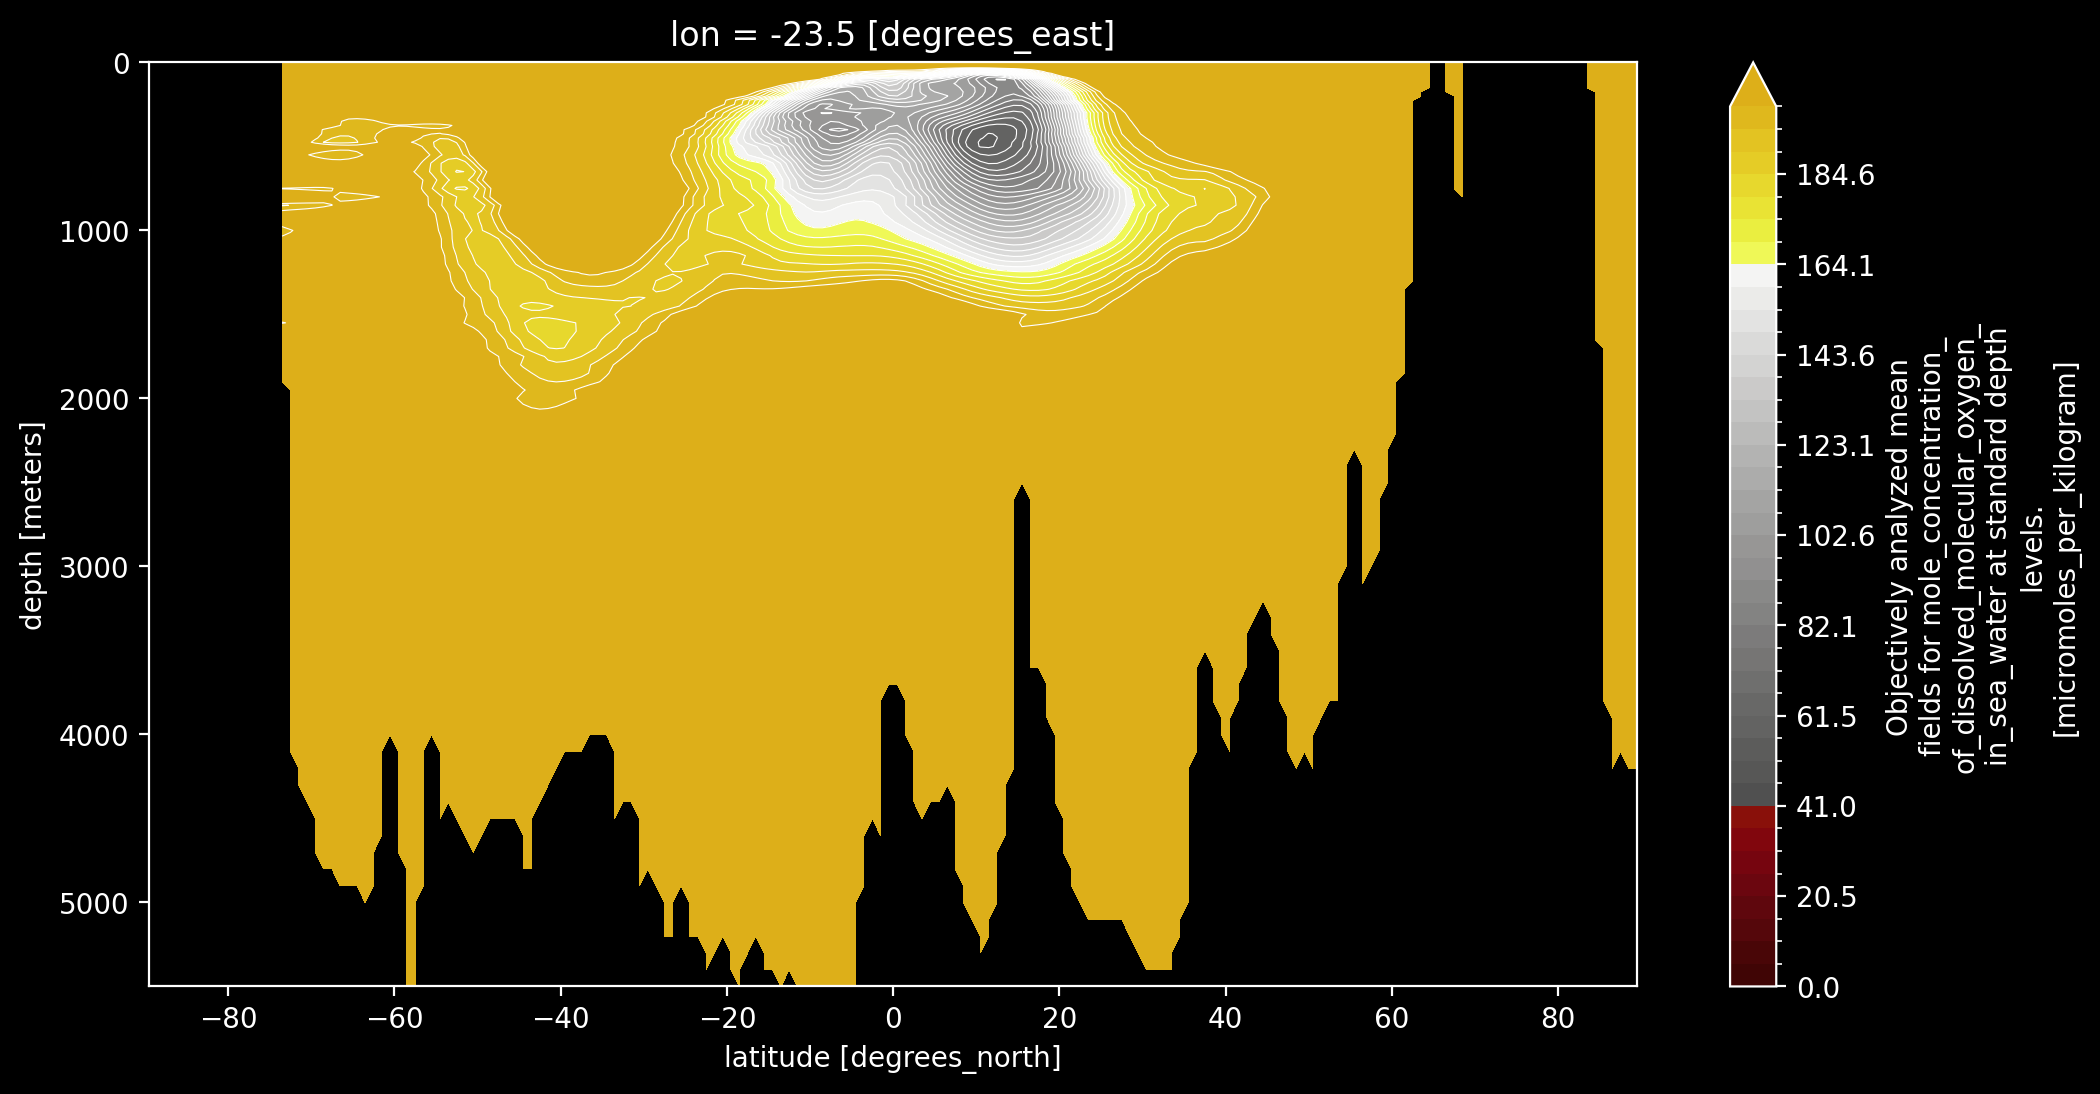

In [17]:
A16_oxygen = oxygen.sel(lon=-24, method='nearest')

# Plot filled contours for oxygen
A16_oxygen.plot.contourf(
    yincrease=False,
    vmin=0, vmax=200,  
    cmap=cmocean.cm.oxy,  
    levels=40
)

# Overlay contour lines for oxygen
A16_oxygen.plot.contour(
    yincrease=False,
    vmin=0, vmax=200,  # Same vmin/vmax for consistency
    colors='white',
    levels=40,
    linewidths=0.4
)

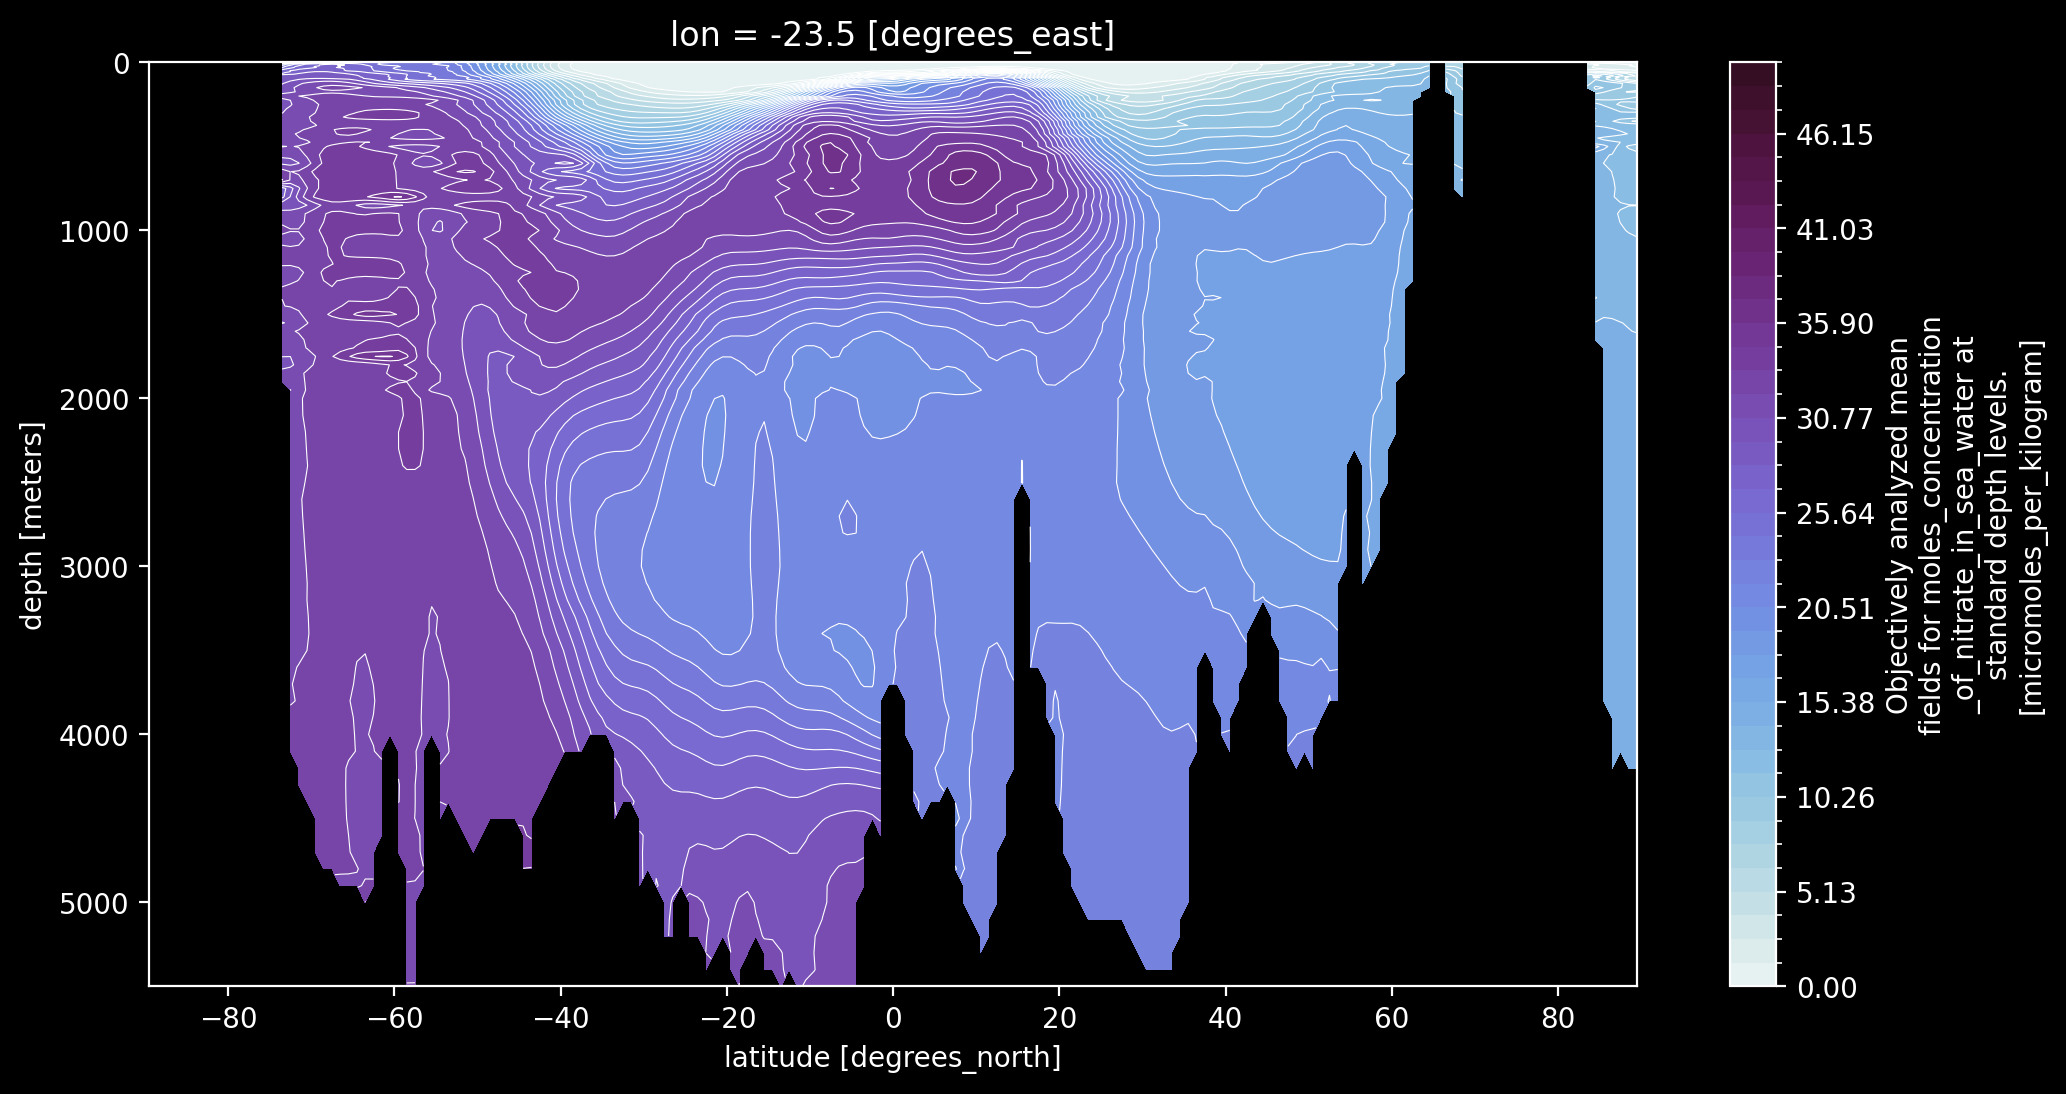

In [18]:
A16_nitrate = nitrate.sel(lon=-24, method='nearest')

# Plot filled contours for nitrate
A16_nitrate.plot.contourf(
    yincrease=False,
    vmin=0, vmax=50,  # Adjust the range for nitrate values
    cmap=cmocean.cm.dense,  # Using the cmocean dense colormap
    levels=40
)

# Overlay contour lines for nitrate
A16_nitrate.plot.contour(
    yincrease=False,
    vmin=0, vmax=50,
    colors='white',
    levels=40,
    linewidths=0.4
)

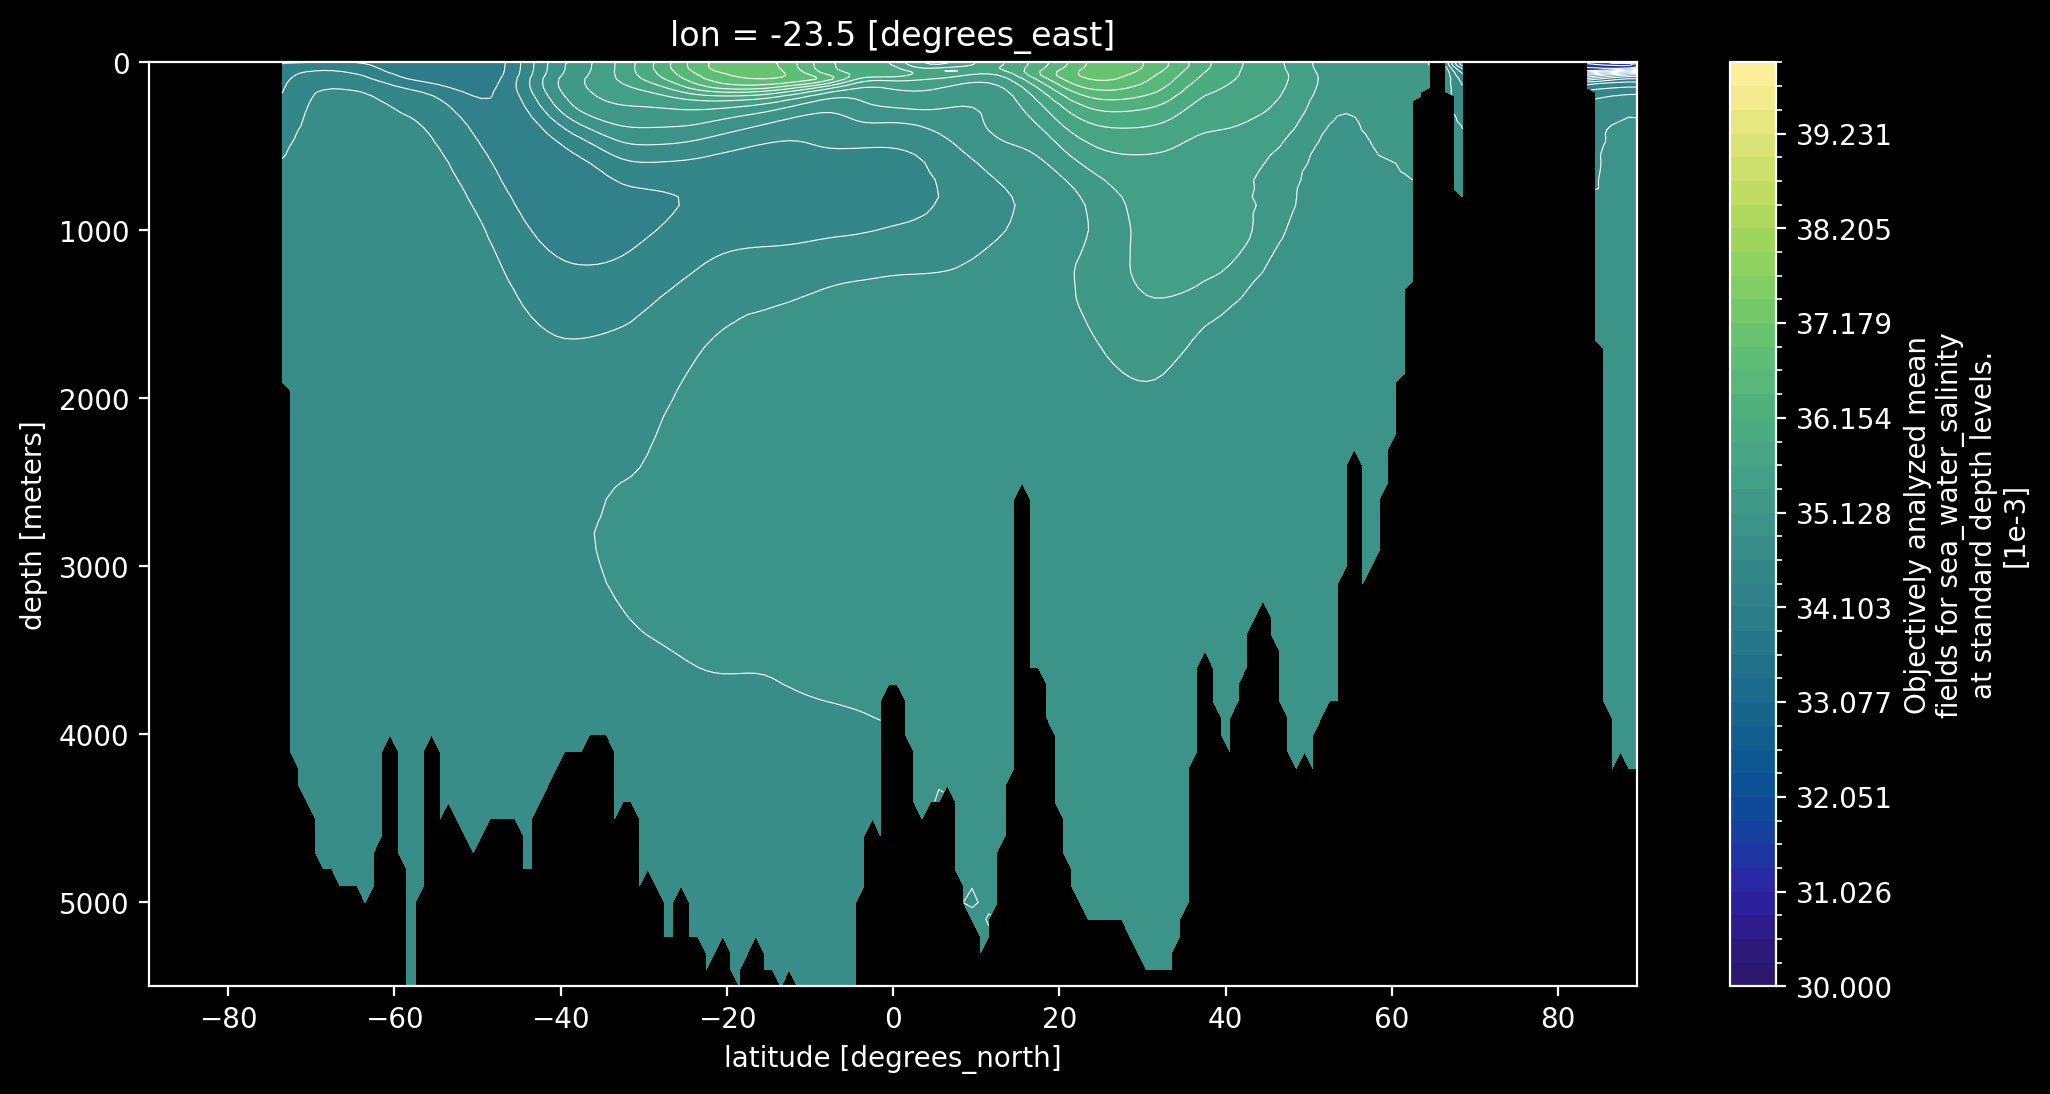

In [19]:
# Assuming salinity is already loaded as an xarray DataArray
A16_salinity = salinity.sel(lon=-24, method='nearest')

# Plot filled contours for salinity
A16_salinity.plot.contourf(
    yincrease=False,
    vmin=30, vmax=40,  # Adjust the range for salinity values
    cmap=cmocean.cm.haline,  # Using the cmocean haline colormap for salinity
    levels=40
)

# Overlay contour lines for salinity
A16_salinity.plot.contour(
    yincrease=False,
    vmin=30, vmax=40,
    colors='white',
    levels=40,
    linewidths=0.4
)

#### <span style="color:red"> In the cells below, repeat the excercise but for ~26 N:

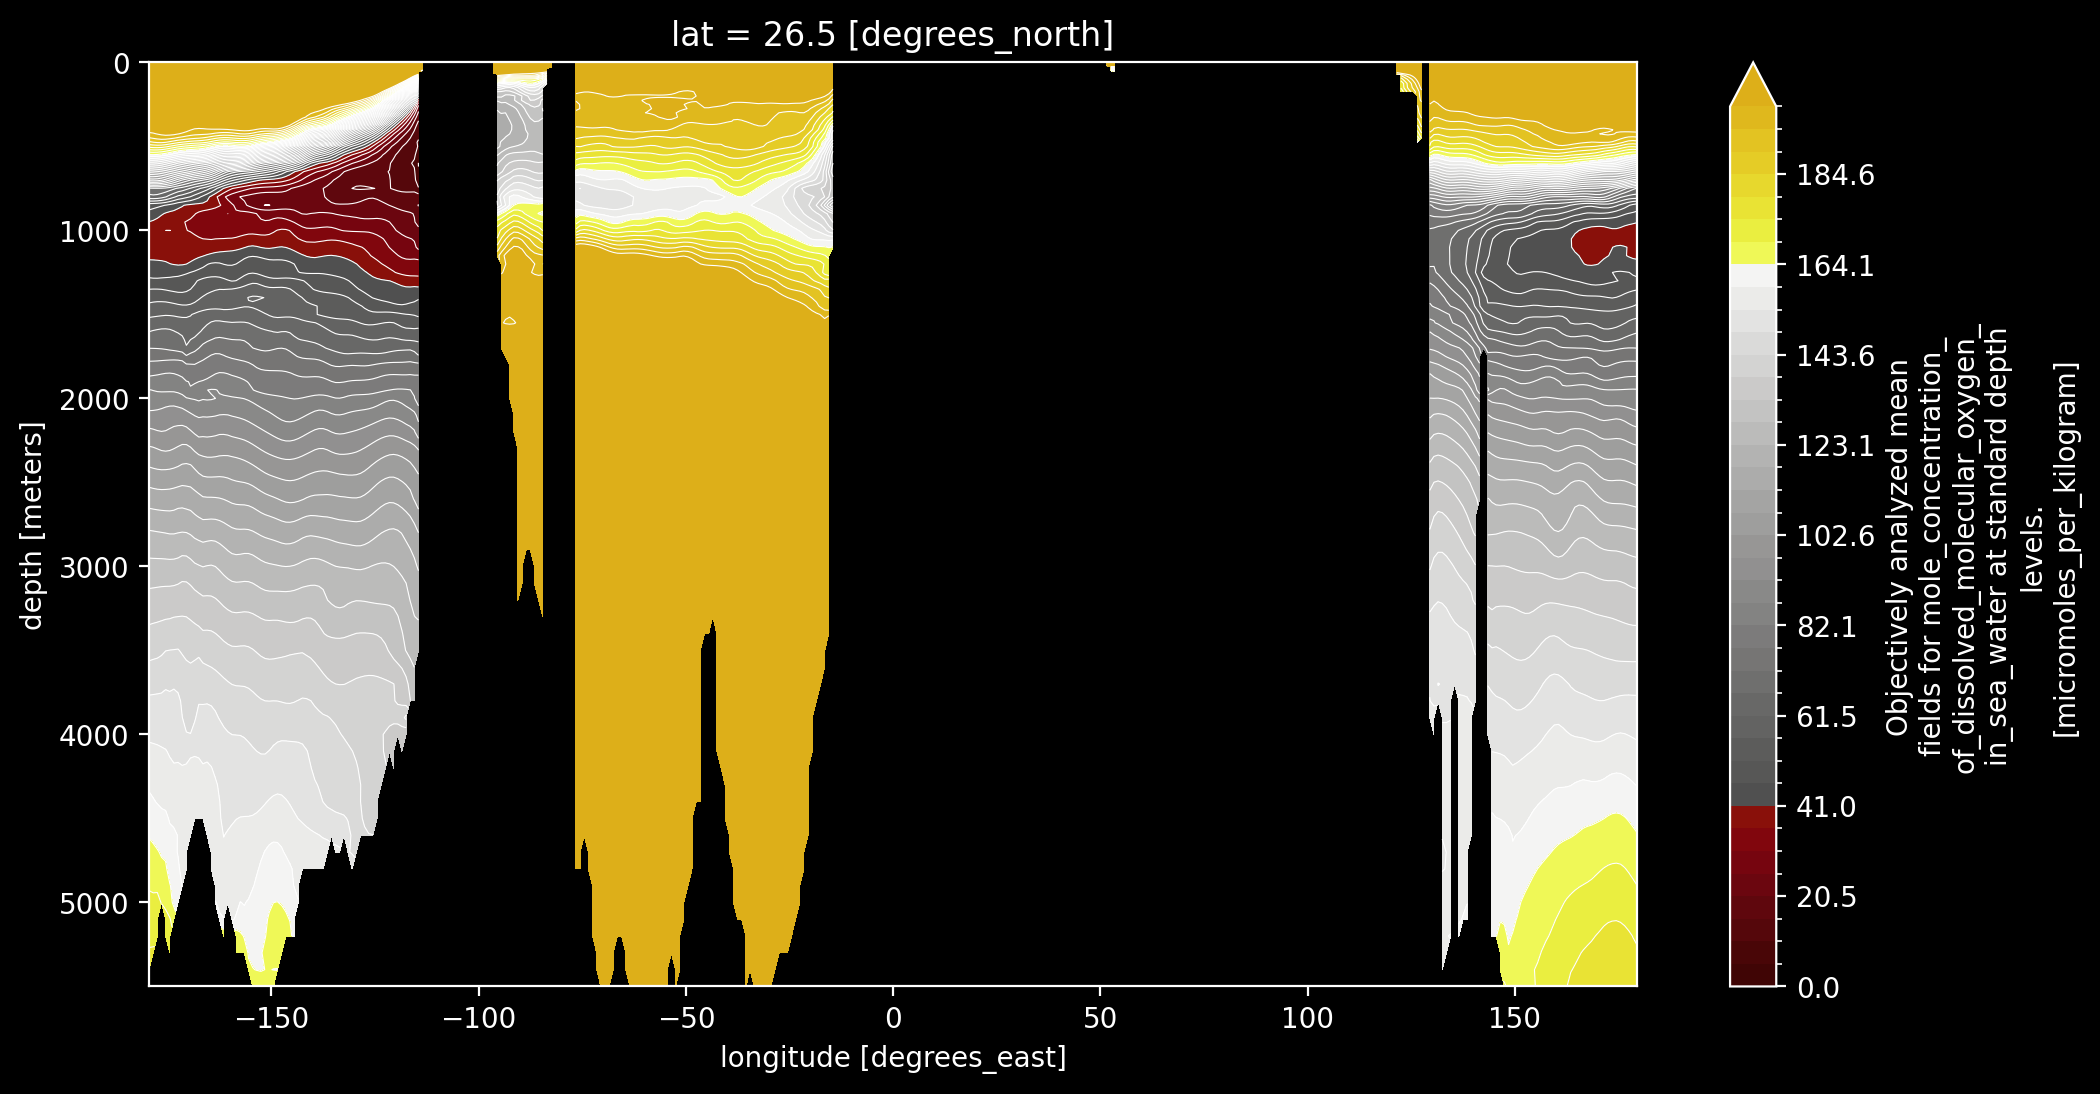

In [28]:
# Slice for ~26° N latitude
A16_oxygen_26N = oxygen.sel(lat=26, method='nearest')

# Plot filled contours for oxygen at 26° N
A16_oxygen_26N.plot.contourf(
    yincrease=False,
    vmin=0, vmax=200,  # Adjust according to the expected oxygen range
    cmap=cmocean.cm.oxy,  # Use the oxygen colormap from cmocean
    levels=40
)

# Overlay contour lines for oxygen at 26° N
A16_oxygen_26N.plot.contour(
    yincrease=False,
    vmin=0, vmax=200,  # Same vmin/vmax for consistency
    colors='white',
    levels=40,
    linewidths=0.4
)

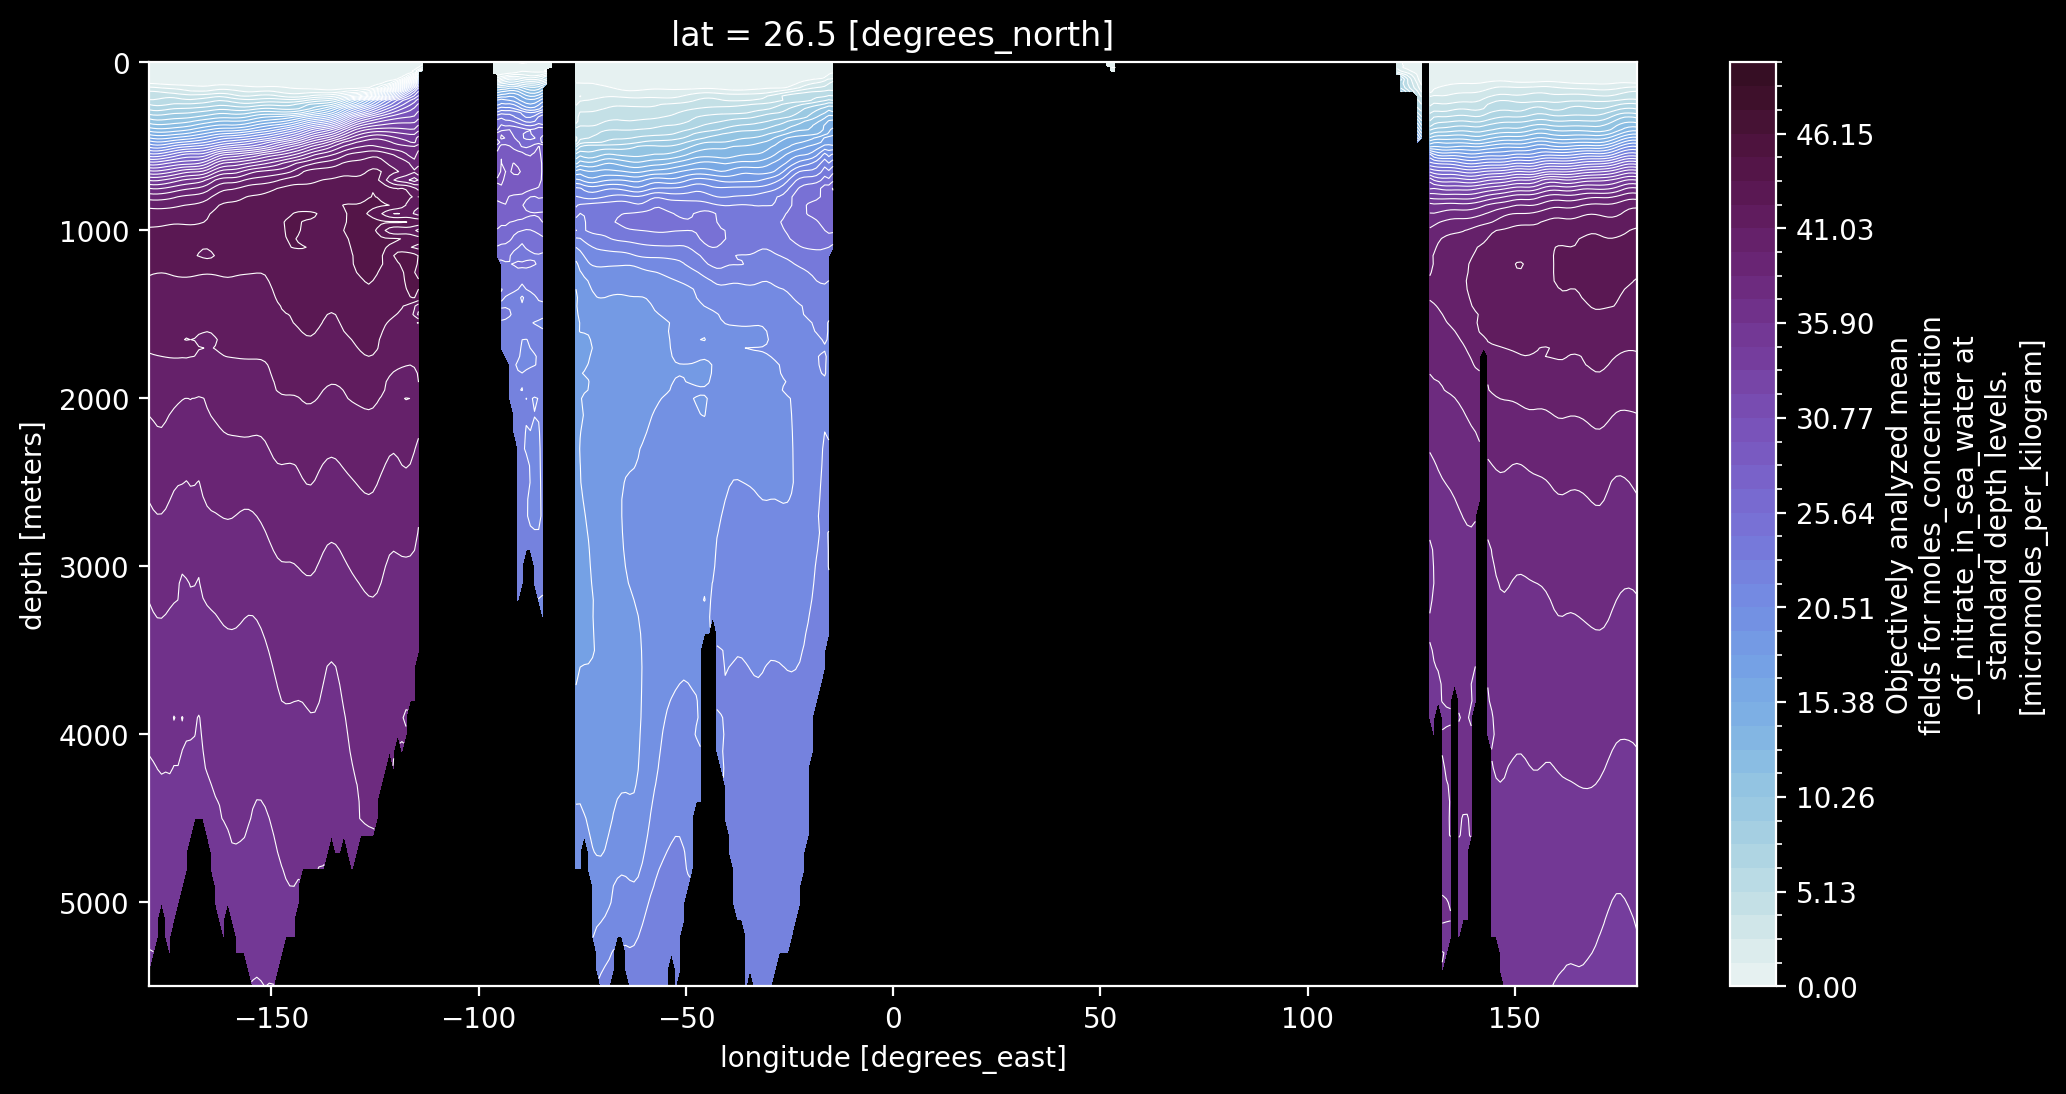

In [21]:
# Slice for ~26° N latitude
A16_nitrate_26N = nitrate.sel(lat=26, method='nearest')

# Plot filled contours for nitrate at 26° N
A16_nitrate_26N.plot.contourf(
    yincrease=False,
    vmin=0, vmax=50,  # Adjust the range for nitrate values
    cmap=cmocean.cm.dense,  # Using the cmocean dense colormap
    levels=40
)

# Overlay contour lines for nitrate at 26° N
A16_nitrate_26N.plot.contour(
    yincrease=False,
    vmin=0, vmax=50,
    colors='white',
    levels=40,
    linewidths=0.4
)

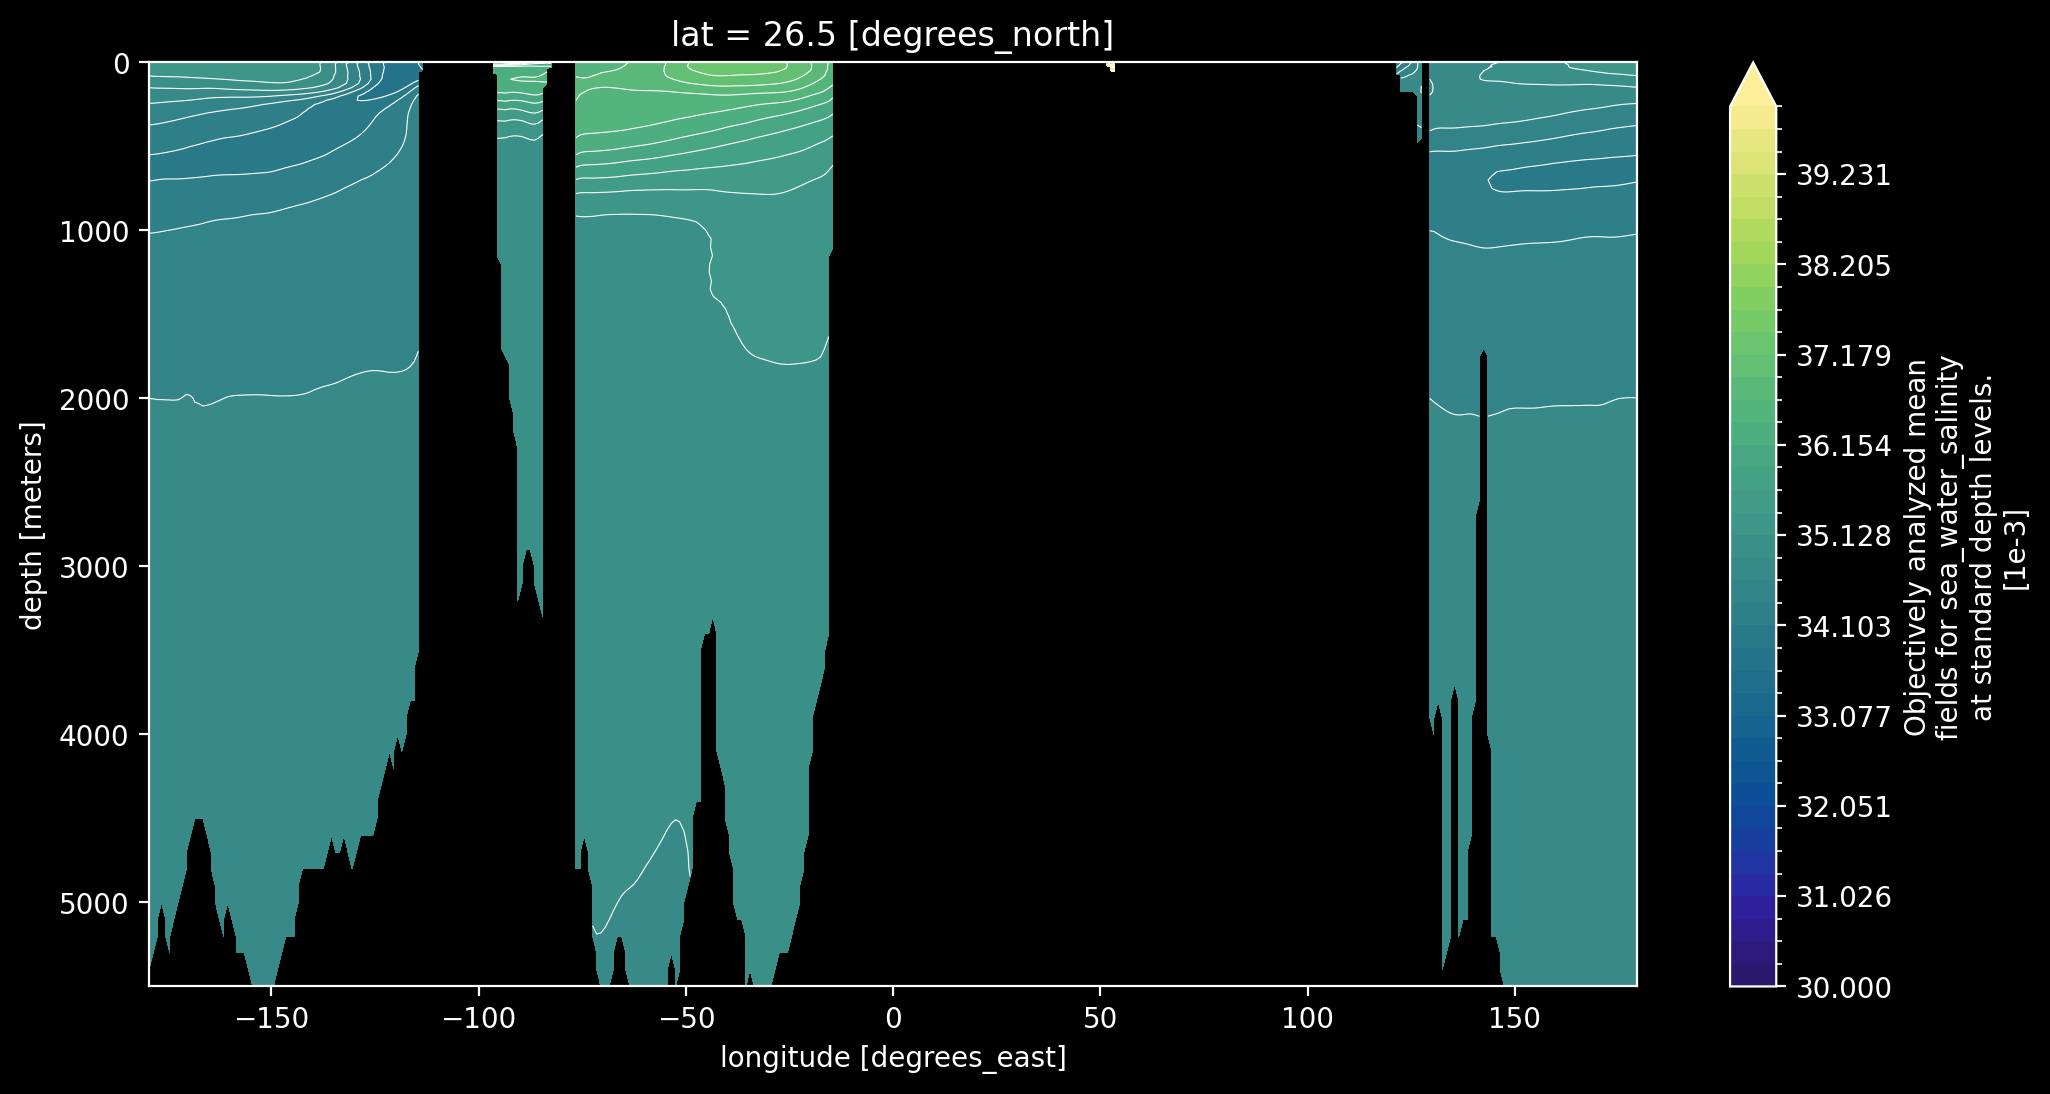

In [22]:
# Slice for ~26° N latitude
A16_salinity_26N = salinity.sel(lat=26, method='nearest')

# Plot filled contours for salinity at 26° N
A16_salinity_26N.plot.contourf(
    yincrease=False,
    vmin=30, vmax=40,  # Adjust the range for salinity values
    cmap=cmocean.cm.haline,  # Using the cmocean haline colormap for salinity
    levels=40
)

# Overlay contour lines for salinity at 26° N
A16_salinity_26N.plot.contour(
    yincrease=False,
    vmin=30, vmax=40,
    colors='white',
    levels=40,
    linewidths=0.4
)

#### <span style="color:red"> Repeat your analysis that we did for surface fields, but at 1000 m depth. Use the SAME vmin and vmax that you used for the surface analysis, so that you can make a one-to-one comparison of how the magnitude of properties are different.

In [23]:
# Select data at ~1000m depth
A16_temp_1000m = temp.sel(depth=1000, method='nearest')
A16_oxygen_1000m = oxygen.sel(depth=1000, method='nearest')
A16_nitrate_1000m = nitrate.sel(depth=1000, method='nearest')
A16_salinity_1000m = salinity.sel(depth=1000, method='nearest')

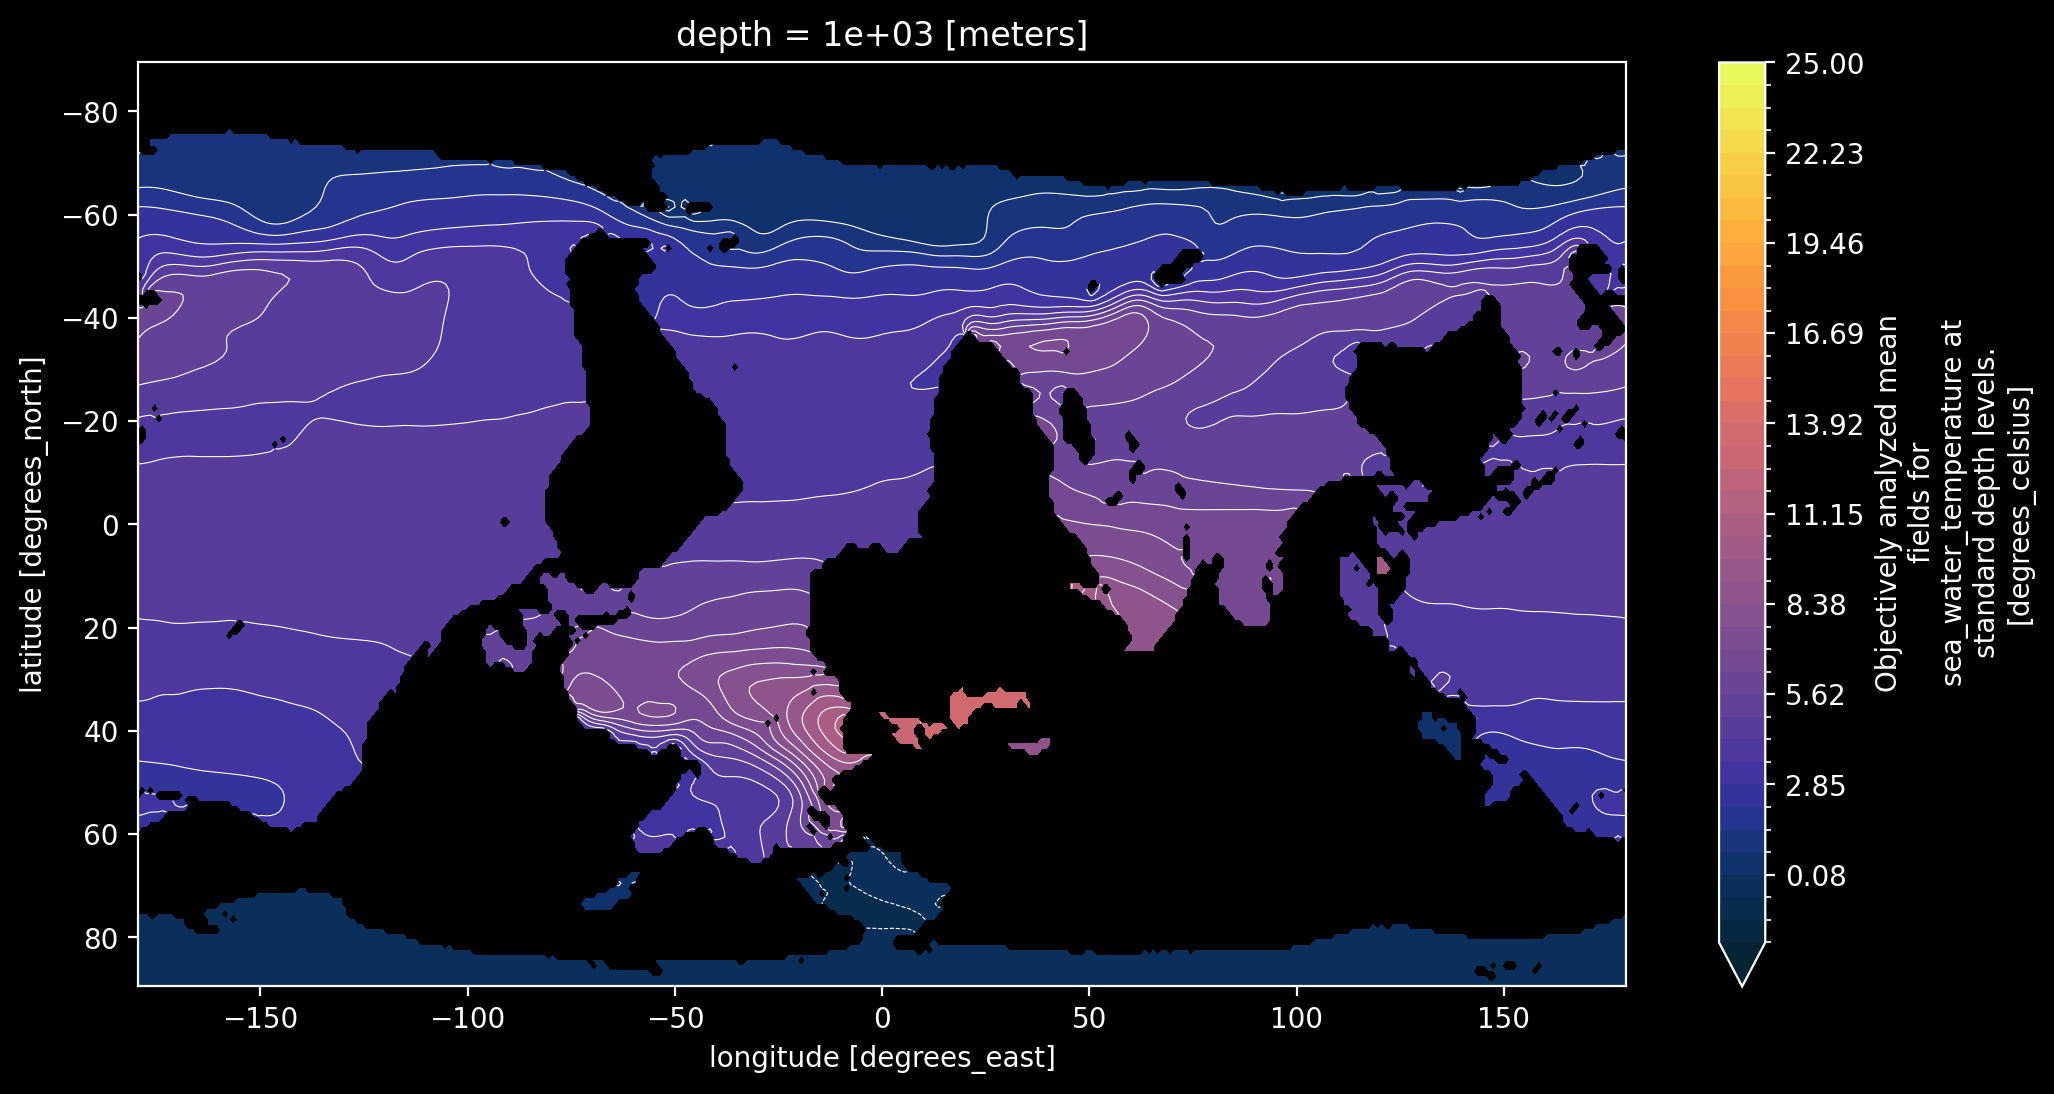

In [24]:
# Plot filled contours for temperature at 1000 m
A16_temp_1000m.plot.contourf(
    yincrease=False,
    vmin=-2, vmax=25,  
    cmap=cmocean.cm.thermal,  
    levels=40
)

# Overlay contour lines for temperature at 1000 m
A16_temp_1000m.plot.contour(
    yincrease=False,
    vmin=-2, vmax=25,
    colors='white',
    levels=40,
    linewidths=0.4
)

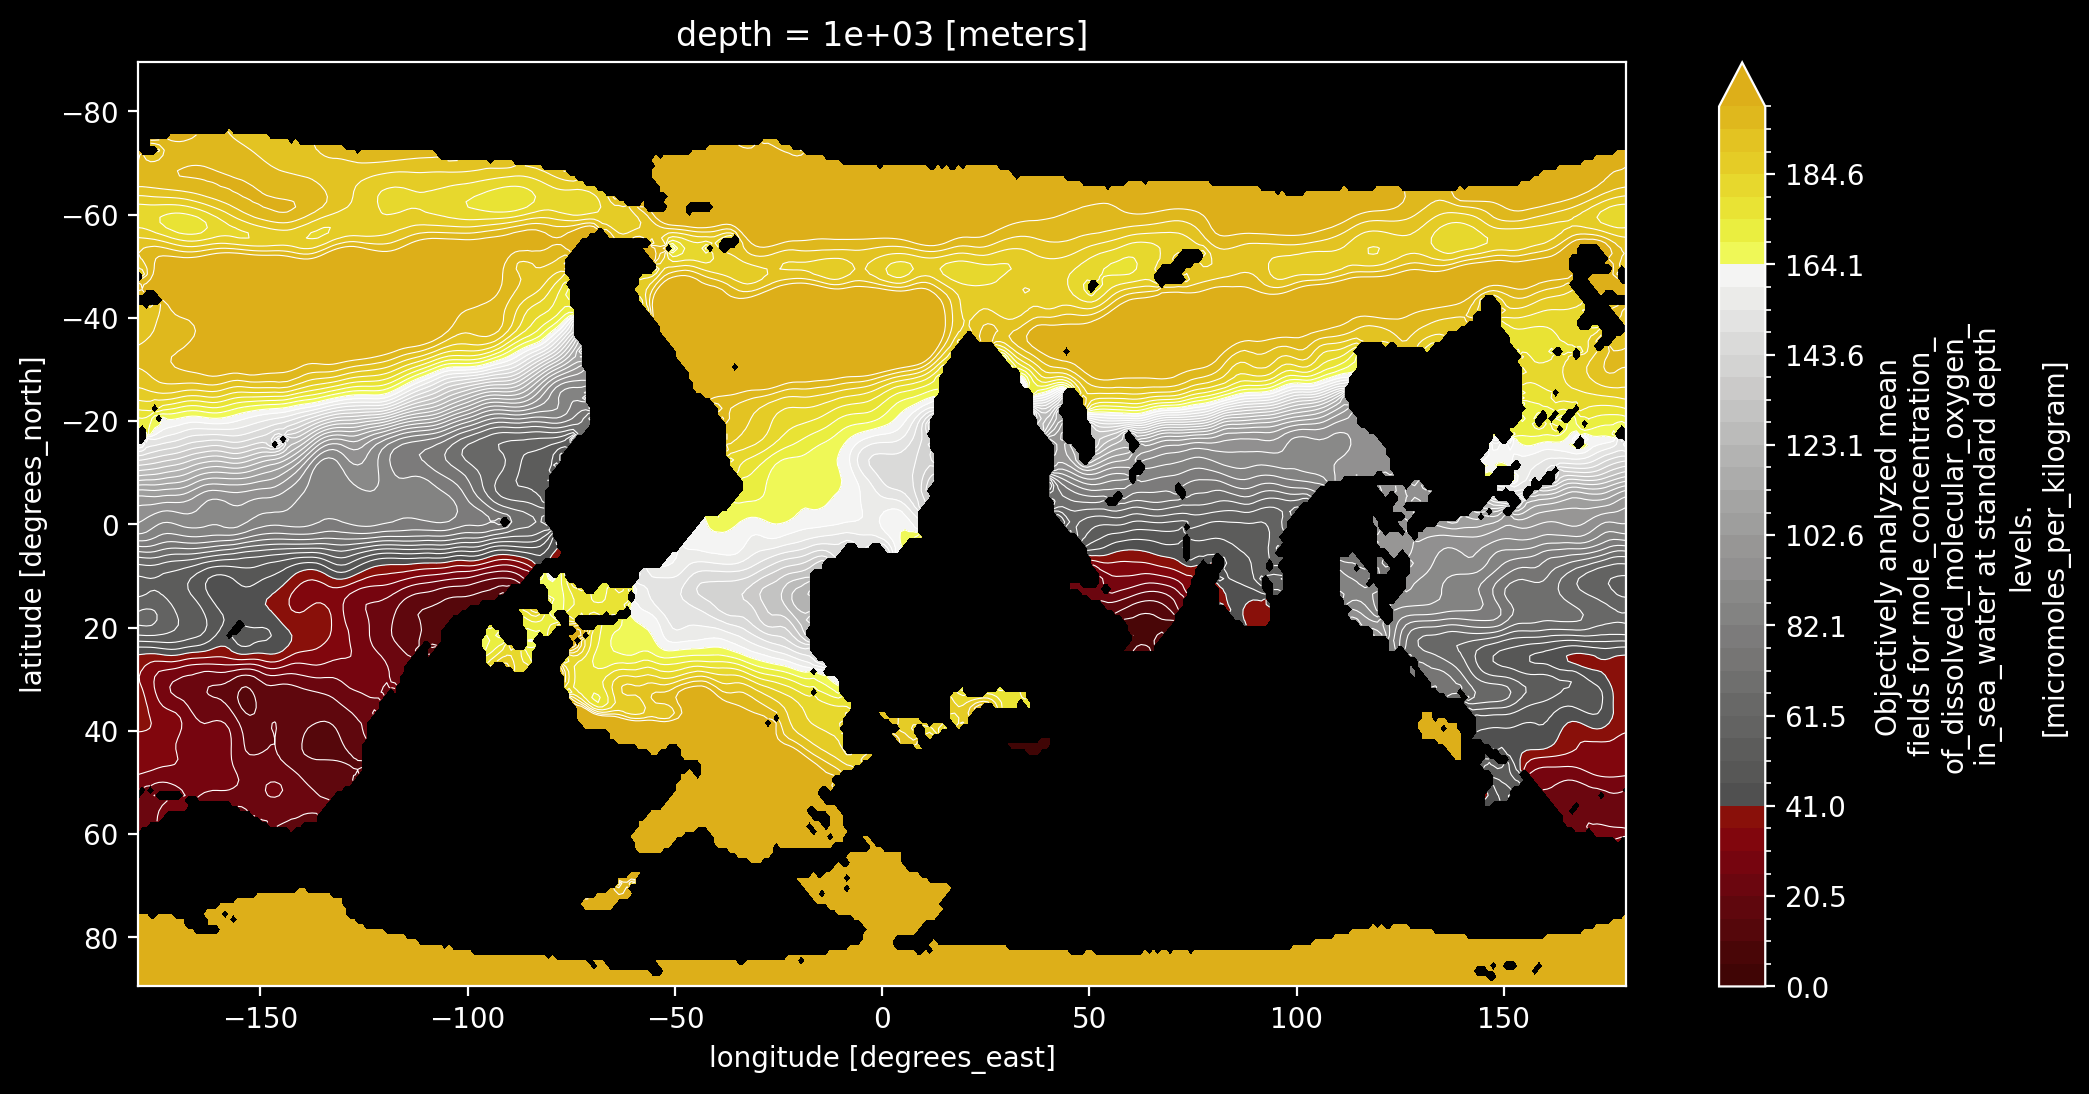

In [25]:
# Plot filled contours for oxygen at 1000 m
A16_oxygen_1000m.plot.contourf(
    yincrease=False,
    vmin=0, vmax=200,   
    cmap=cmocean.cm.oxy, 
    levels=40
)

# Overlay contour lines for oxygen at 1000 m
A16_oxygen_1000m.plot.contour(
    yincrease=False,
    vmin=0, vmax=200,
    colors='white',
    levels=40,
    linewidths=0.4
)

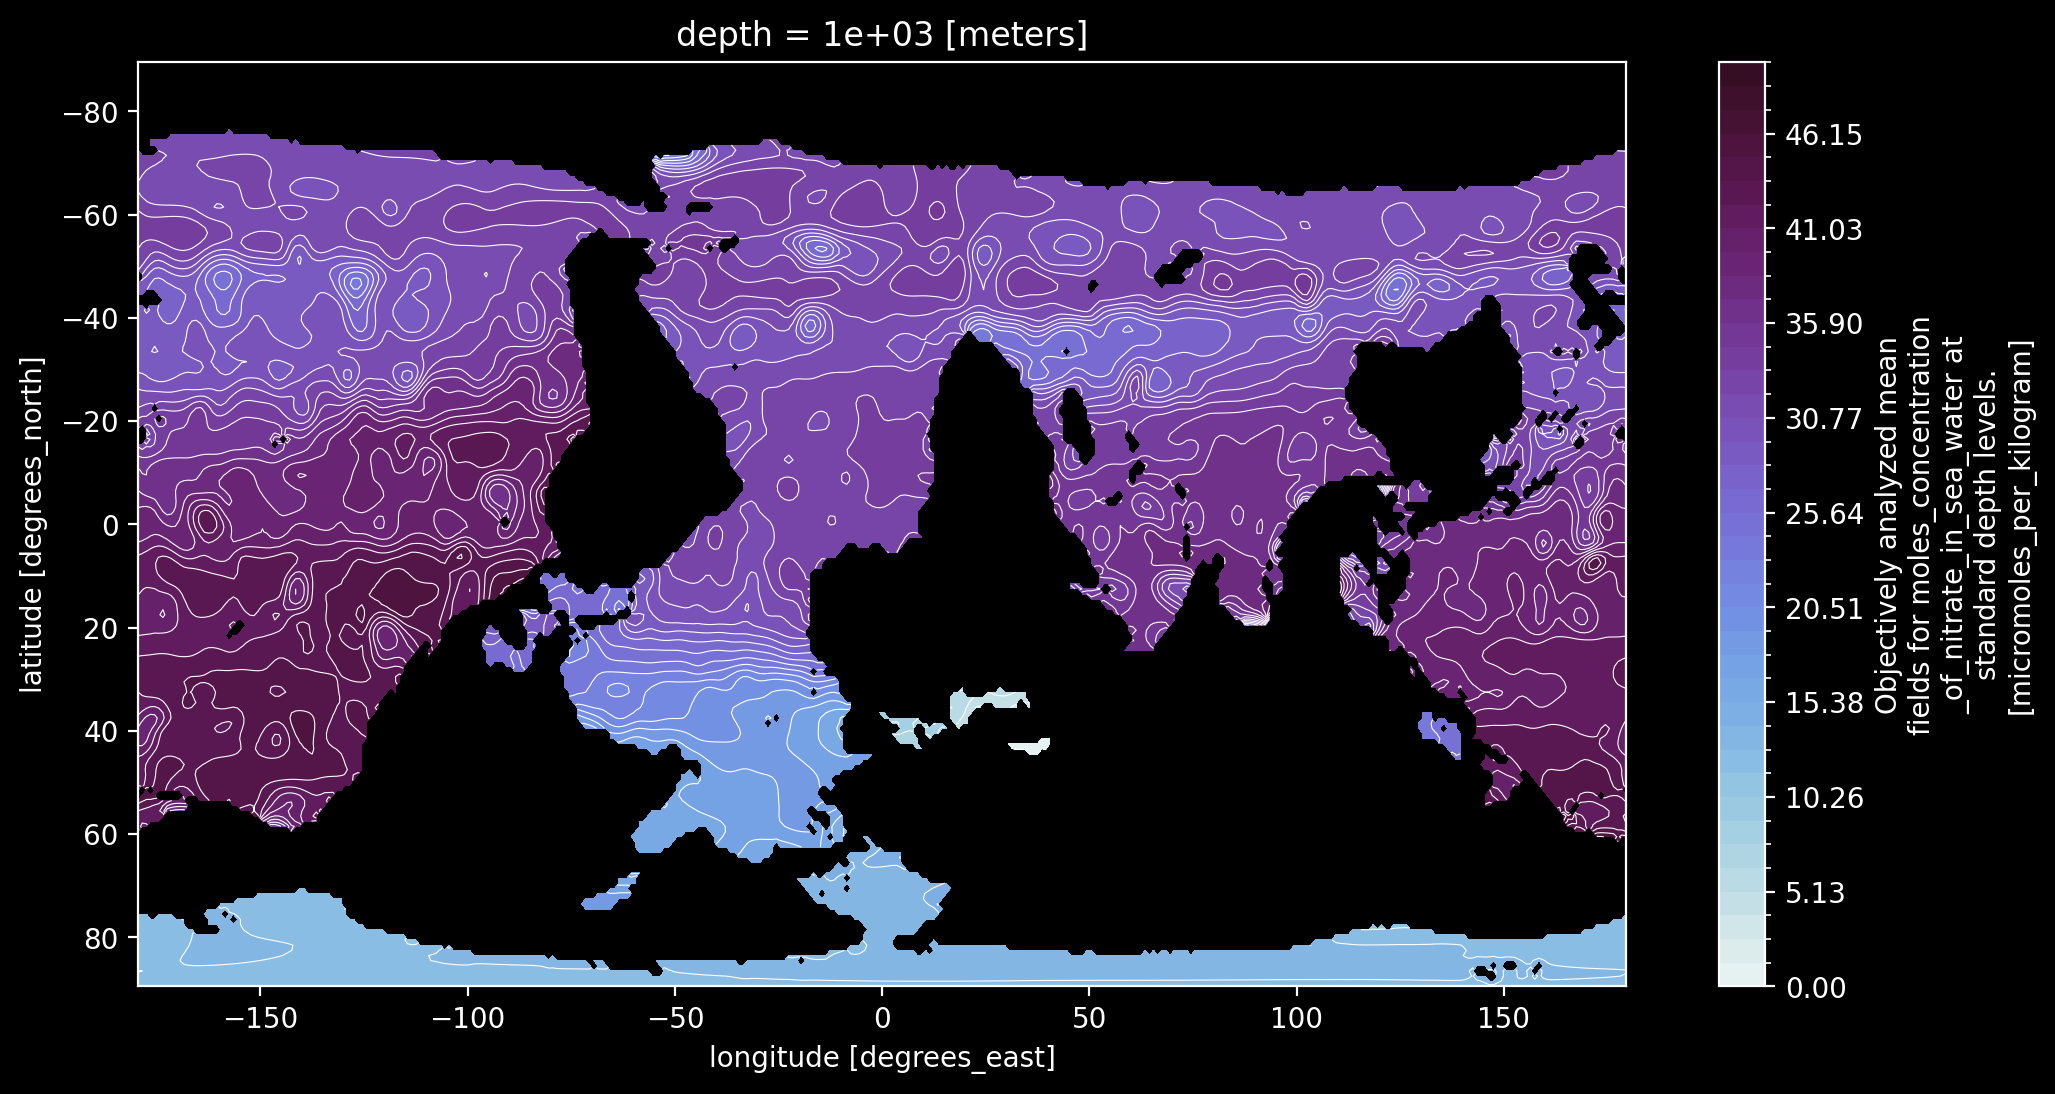

In [26]:
# Plot filled contours for nitrate at 1000 m
A16_nitrate_1000m.plot.contourf(
    yincrease=False,
    vmin=0, vmax=50,   
    cmap=cmocean.cm.dense,  
    levels=40
)

# Overlay contour lines for nitrate at 1000 m
A16_nitrate_1000m.plot.contour(
    yincrease=False,
    vmin=0, vmax=50,
    colors='white',
    levels=40,
    linewidths=0.4
)

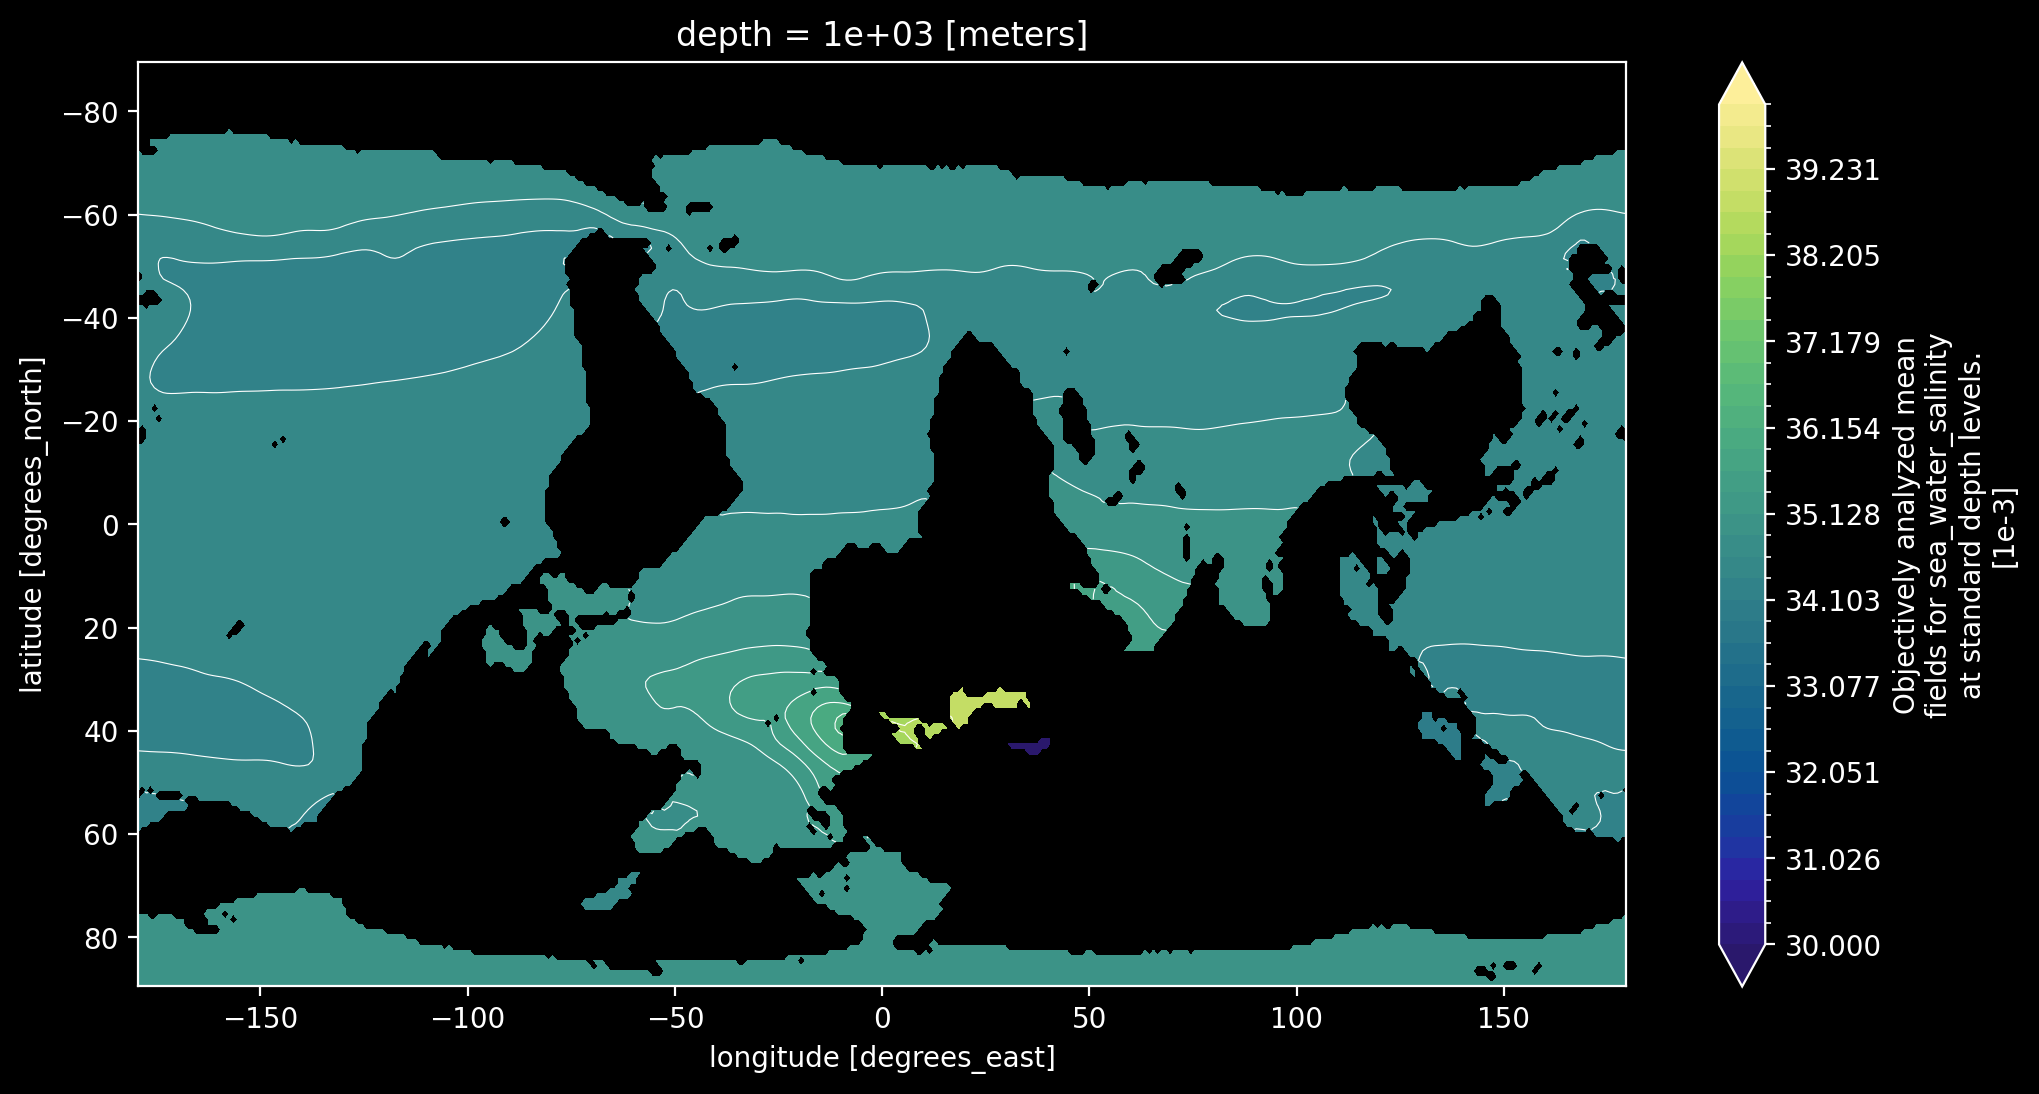

In [27]:
# Plot filled contours for salinity at 1000 m
A16_salinity_1000m.plot.contourf(
    yincrease=False,
    vmin=30, vmax=40,   
    cmap=cmocean.cm.haline,  
    levels=40
)

# Overlay contour lines for salinity at 1000 m
A16_salinity_1000m.plot.contour(
    yincrease=False,
    vmin=30, vmax=40,
    colors='white',
    levels=40,
    linewidths=0.4
)

#### <span style="color:red"> Drag and drop all your figures into a PowerPoint and so that you can easily compare them against one another - what patterns do you observe on the spatial distribtions a) at the surface, b) in the interior ocean. Use arrows to draw any connections you observe between the surface and interior ocean.

#### <span style="color:red"> In your PowerPoint put labels on your plots identifying the three "basins" you see in your 26 N cross-sections.

#### <span style="color:red"> Discuss how the subsurface properties differ between the North subtropical Atlantic and North subtropical Atlantic. Make statements like "the interior ocean in the Atlantic has ____ levels of nitrate relative to the Pacific ____".

#### <span style="color:red"> Based off of your brief intro to physical oceanography ... hypothesize why you might see some of these features ...

Salinity Differences:
The Atlantic has higher salinity at 26° N due to stronger evaporation and lower precipitation, especially in the subtropical gyre. The Atlantic Meridional Overturning Circulation (AMOC) also transports warm, salty water from the tropics, reinforcing surface salinity. In contrast, the Pacific has fresher surface waters due to higher rainfall and more freshwater input.

Nitrate Differences: 
Nitrate levels are higher in the Atlantic due to more efficient nutrient cycling and mixing, aided by the AMOC and frequent upwelling. These processes bring nutrient-rich deep waters to the surface. In the Pacific, the more stratified water column results in less vertical mixing and lower nitrate concentrations in the interior.

Oxygen Differences: 
The Atlantic’s higher biological productivity leads to a pronounced oxygen minimum zone (OMZ) in the intermediate depths, where organic matter decomposition consumes oxygen. The Pacific, with lower productivity and less mixing, has a deeper and less intense OMZ, maintaining relatively higher oxygen levels in the upper waters.



### Push your final notebook with completed analysis and answers to the questions to GitHub and submit your PowerPoint with labeled basins and interior pathways via Canvas when you are done.